In [1]:
pip install mediapipe

Note: you may need to restart the kernel to use updated packages.


In [2]:
import math
import cv2
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

In [3]:
mp_pose = mp.solutions.pose
 
# Setting up the Pose function.
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)
 
# Initializing mediapipe drawing class, useful for annotation.
mp_drawing = mp.solutions.drawing_utils

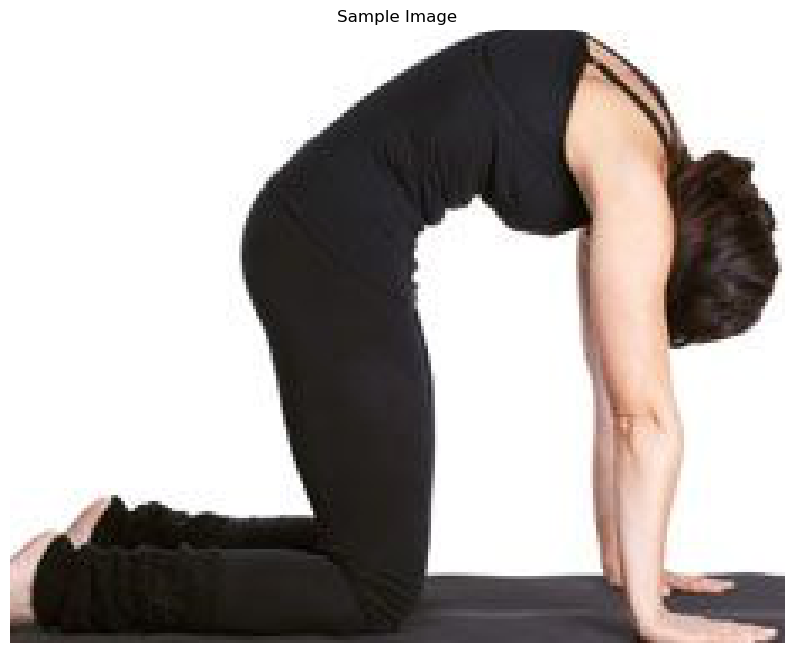

In [4]:
#reading an image
sample_img = cv2.imread('File9.png')
 
# Specify a size of the figure.
plt.figure(figsize = [10, 10])
 
# Display the sample image, also convert BGR to RGB for display. 
plt.title("Sample Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

In [5]:
# Perform pose detection after converting the image into RGB format.
results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))

# Check if any landmarks are found.
if results.pose_landmarks:
    
    # Iterate two times as we only want to display first two landmarks.
    for i in range(2):
        
        # Display the found normalized landmarks.b
        print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}')

NOSE:
x: 0.7696877121925354
y: 0.41813650727272034
z: 0.09222416579723358
visibility: 0.9924208521842957

LEFT_EYE_INNER:
x: 0.8031170964241028
y: 0.4389767348766327
z: 0.096172034740448
visibility: 0.9704605937004089



In [6]:
image_height, image_width, _ = sample_img.shape
 
# Check if any landmarks are found.
if results.pose_landmarks:
    
    # Iterate two times as we only want to display first two landmark.
    for i in range(32):
        
        # Display the found landmarks after converting them into their original scale.
        print(f'{mp_pose.PoseLandmark(i).name}:') 
        print(f'{i} = x: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].x * image_width}')
        print(f'y: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].y * image_height}')
        print(f'z: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].z * image_width}')
        print(f'visibility: {results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value].visibility}\n')

NOSE:
0 = x: 177.02817380428314
y: 76.1008443236351
z: 21.211558133363724
visibility: 0.9924208521842957

LEFT_EYE_INNER:
1 = x: 184.71693217754364
y: 79.89376574754715
z: 22.11956799030304
visibility: 0.9704605937004089

LEFT_EYE:
2 = x: 185.92068433761597
y: 79.27061605453491
z: 21.957012712955475
visibility: 0.9846858978271484

LEFT_EYE_OUTER:
3 = x: 187.03822016716003
y: 78.57400339841843
z: 21.994830891489983
visibility: 0.9835050702095032

RIGHT_EYE_INNER:
4 = x: 184.92599546909332
y: 79.57143235206604
z: 5.066283438354731
visibility: 0.9827248454093933

RIGHT_EYE:
5 = x: 186.281356215477
y: 78.86418318748474
z: 4.887261427938938
visibility: 0.993931770324707

RIGHT_EYE_OUTER:
6 = x: 187.68275201320648
y: 78.0950459241867
z: 4.774289708584547
visibility: 0.9916940331459045

LEFT_EAR:
7 = x: 193.54703903198242
y: 70.8447168469429
z: 44.01304602622986
visibility: 0.9934810400009155

RIGHT_EAR:
8 = x: 194.32464480400085
y: 70.62100845575333
z: -32.80986860394478
visibility: 0.992651

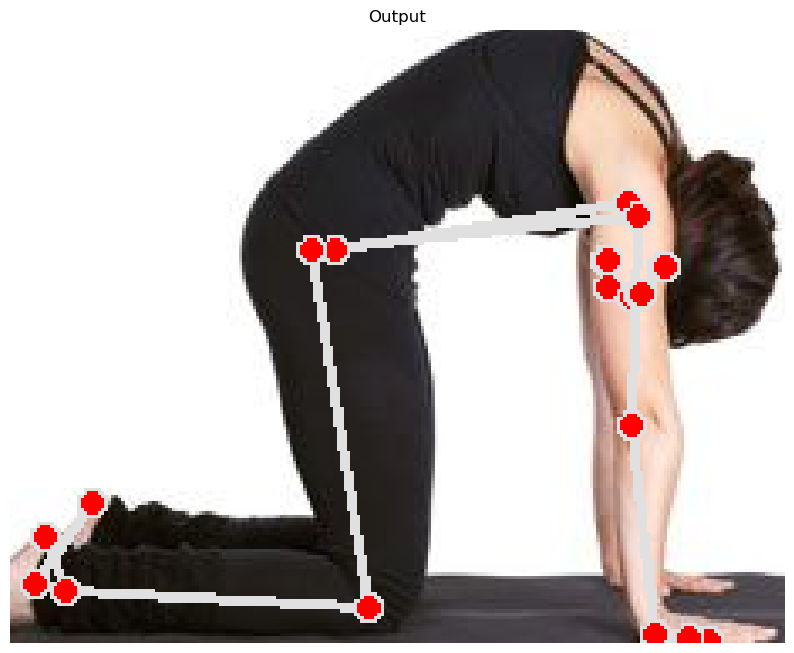

In [7]:
img_copy = sample_img.copy()
 
# Check if any landmarks are found.
if results.pose_landmarks:
    
    # Draw Pose landmarks on the sample image.
    mp_drawing.draw_landmarks(image=img_copy, landmark_list=results.pose_landmarks, connections=mp_pose.POSE_CONNECTIONS)
       
    # Specify a size of the figure.
    fig = plt.figure(figsize = [10, 10])
 
    # Display the output image with the landmarks drawn, also convert BGR to RGB for display. 
    plt.title("Output");plt.axis('off');plt.imshow(img_copy[:,:,::-1]);plt.show()

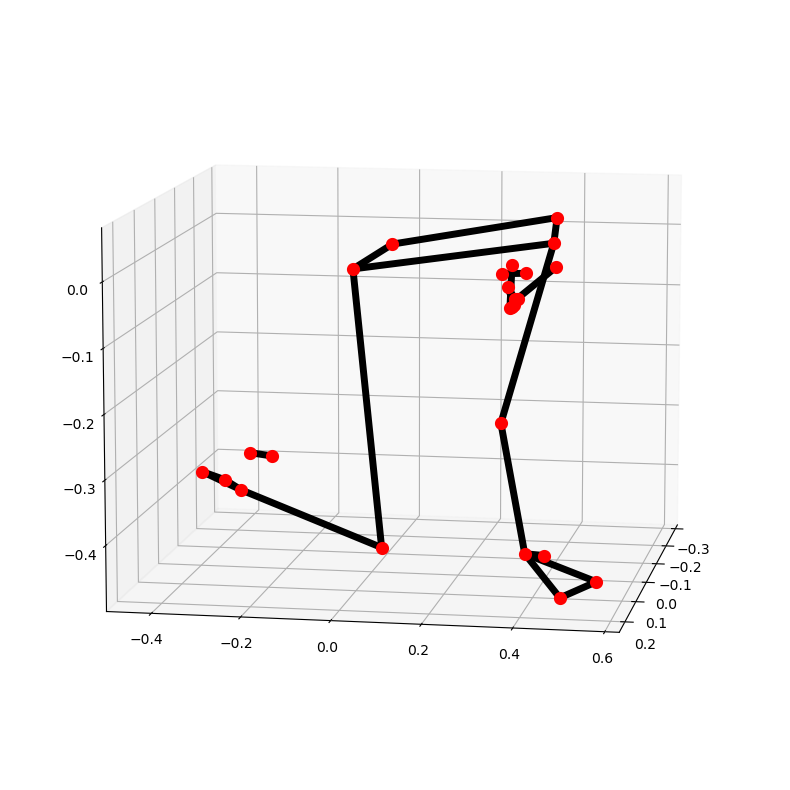

In [8]:
# Plot Pose landmarks in 3D.
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

In [53]:
def detectPose(image, pose, display=True):
    '''
    This function performs pose detection on an image.
    Args:
        image: The input image with a prominent person whose pose landmarks needs to be detected.
        pose: The pose setup function required to perform the pose detection.
        display: A boolean value that is if set to true the function displays the original input image, the resultant image, 
                 and the pose landmarks in 3D plot and returns nothing.
    Returns:
        output_image: The input image with the detected pose landmarks drawn.
        landmarks: A list of detected landmarks converted into their original scale.
    '''
    
    # Create a copy of the input image.
    output_image = image.copy()
    
    
    # Convert the image from BGR into RGB format.
    imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Perform the Pose Detection.
    results = pose.process(imageRGB)
    
    # Retrieve the height and width of the input image.
    height, width, _ = image.shape
    
    # Initialize a list to store the detected landmarks.
    landmarks = []
    
    # Check if any landmarks are detected.
    if results.pose_landmarks:
    
        # Draw Pose landmarks on the output image.
        mp_drawing.draw_landmarks(image=output_image, landmark_list=results.pose_landmarks,
                                  connections=mp_pose.POSE_CONNECTIONS)
        
        # Iterate over the detected landmarks.
        for landmark in results.pose_landmarks.landmark:
            
            # Append the landmark into the list.
            landmarks.append((int(landmark.x * width), int(landmark.y * height),
                                  (landmark.z * width)))
    
    # Check if the original input image and the resultant image are specified to be displayed.
    if display:
    
        # Display the original input image and the resultant image.
        plt.figure(figsize=[22,22])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
        
        # Also Plot the Pose landmarks in 3D.
        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
        
    # Otherwise
    else:
        
        # Return the output image and the found landmarks.
        return output_image, landmarks

In [1]:
image = cv2.imread('file5.jpeg')
detectPose(image, pose, display=True)

NameError: name 'cv2' is not defined

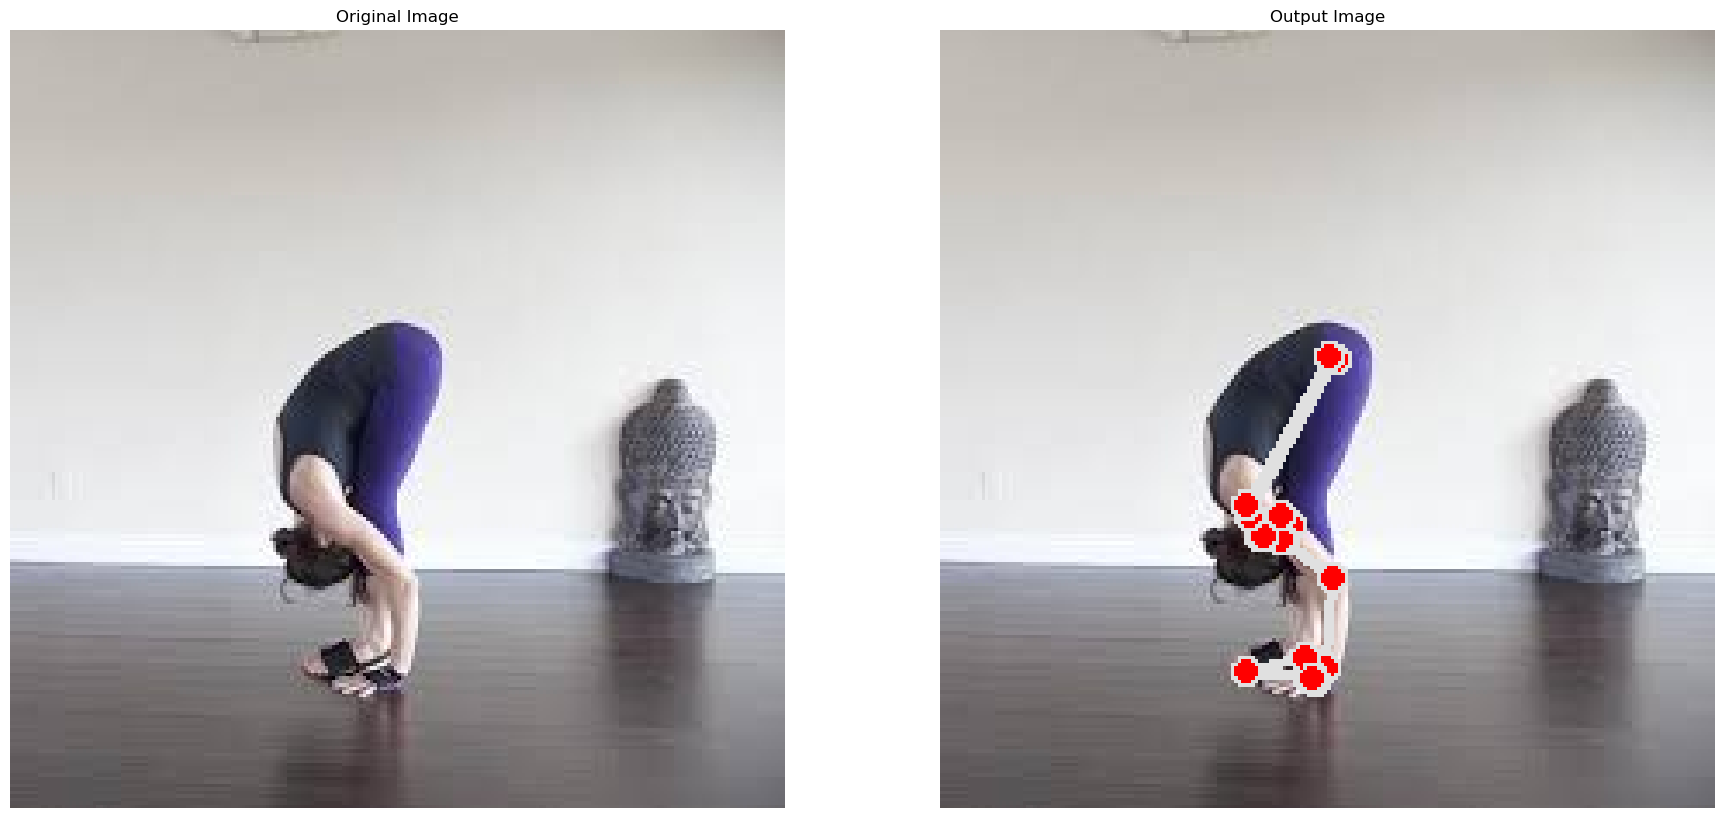

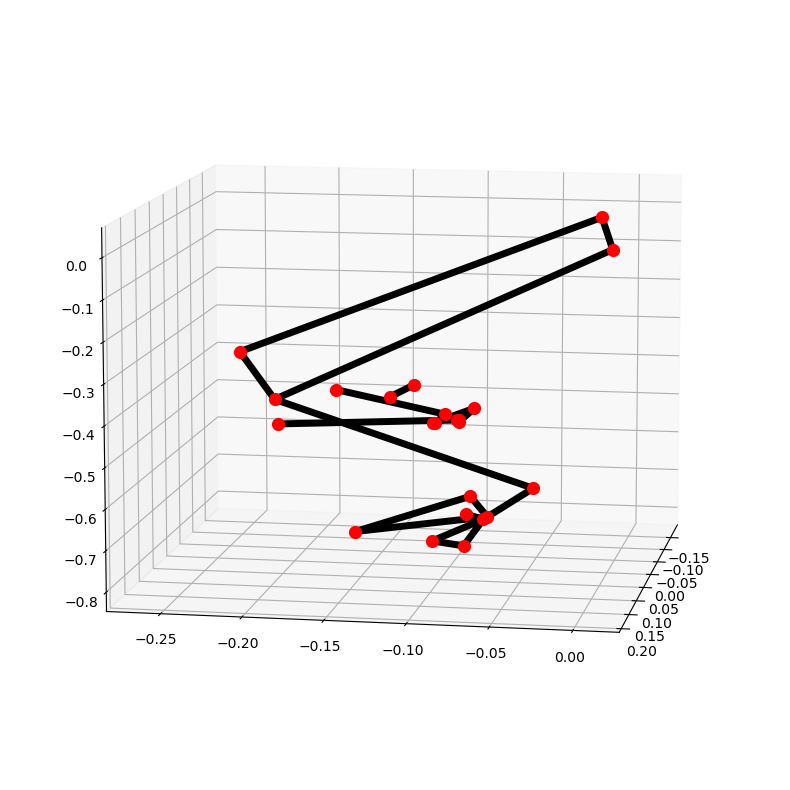

In [11]:
image = cv2.imread('File66.jpeg')
detectPose(image, pose, display=True)

In [12]:
import cv2
import mediapipe as mp
from time import time

# Initialize the Pose detection module
mp_pose = mp.solutions.pose
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, model_complexity=1)

# Initialize the VideoCapture object to read from the webcam.
video = cv2.VideoCapture(0)
cv2.namedWindow('Pose Detection', cv2.WINDOW_NORMAL)
screen_width, screen_height = 1920, 1080  # Replace with your screen resolution

# Calculate the window size as a percentage of the screen size (e.g., 80%)
window_width = int(screen_width * 0.8)
window_height = int(screen_height * 0.8)

# Check if the webcam opened successfully.
if not video.isOpened():
    print("Error: Could not open webcam.")
else:
    # Initialize a variable to store the time of the previous frame.
    time1 = 0

    try:
        frames_stats = []
        # Iterate until the video is accessed successfully.
        while video.isOpened():
            # Read a frame.
            ok, frame = video.read()

            # Check if frame is not read properly.
            if not ok:
                # Break the loop.
                break

            # Flip the frame horizontally for natural (selfie-view) visualization.
            frame = cv2.flip(frame, 1)

            # Get the width and height of the frame
            frame_height, frame_width, _ = frame.shape

            # Resize the frame while keeping the aspect ratio.
            frame = cv2.resize(frame, (int(frame_width * (640 / frame_height)), 640))

            # Perform Pose landmark detection.
            frame, _ = detectPose(frame, pose_video, display=False)

            # Set the time for this frame to the current time.
            time2 = time()

            # Check if the difference between the previous and this frame time > 0 to avoid division by zero.
            if (time2 - time1) > 0:
                # Calculate the number of frames per second.
                frames_per_second = 1.0 / (time2 - time1)
                frames_stats.append(frames_per_second)

                # Write the calculated number of frames per second on the frame.
                cv2.putText(frame, 'FPS: {}'.format(int(frames_per_second)), (10, 30), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 3)

            # Update the previous frame time to this frame time.
            # As this frame will become previous frame in the next iteration.
            time1 = time2

            # Display the frame.
            cv2.imshow('Pose Detection', frame)

            # Wait until a key is pressed.
            # Retrieve the ASCII code of the key pressed.
            k = cv2.waitKey(1) & 0xFF

            # Check if 'ESC' is pressed.
            if k == 27:
                # Break the loop.
                break

    except Exception as e:
        print("An error occurred:", str(e))

    finally:
        # Release the VideoCapture object.
        video.release()

        # Close the windows.
        cv2.destroyAllWindows()
print(frames_stats)
print(max(frames_stats))

[5.896527454438465e-10, 22.35829313148005, 23.12045024833114, 26.632530732500253, 27.28268774189352, 21.33854293854294, 27.75221988434105, 23.52359479983399, 21.056165786461577, 29.15059353367991, 21.349621802115465, 15.764385744676053, 23.421529045840103, 32.61486302594847, 20.979597144900787, 30.386020835446338, 22.477754316766525, 17.3765686042995, 27.901387650838842, 16.350978687572365, 27.2502501331878, 32.25593700012305, 28.109319500851125, 23.525441981513058, 29.830616483172598, 23.26433670384771, 30.659444602823037, 29.786340749788728, 22.864718709114698, 28.096515319998392, 23.070471496776747, 20.901604134171198, 20.803015573851802, 31.218536244073448, 28.56474273844792, 21.964881778429472, 22.82751076254905, 20.547018595810552, 20.960725226508348, 31.081581385008707, 28.37113848360018, 24.165052515138072, 29.78443709079547, 31.171206254598424, 29.656185701861684, 27.38582882812296, 25.619859143745458, 16.961691355178925, 26.07814170956751, 22.276475961844874, 20.7788996007014

In [13]:
def calculateAngle(landmark1, landmark2, landmark3):
    '''
    This function calculates angle between three different landmarks.
    Args:
        landmark1: The first landmark containing the x,y and z coordinates.
        landmark2: The second landmark containing the x,y and z coordinates.
        landmark3: The third landmark containing the x,y and z coordinates.
    Returns:
        angle: The calculated angle between the three landmarks.
 
    '''
 
    # Get the required landmarks coordinates.
    x1, y1, _ = landmark1
    x2, y2, _ = landmark2
    x3, y3, _ = landmark3
 
    # Calculate the angle between the three points
    angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - math.atan2(y1 - y2, x1 - x2))
    
    # Check if the angle is less than zero.
    if angle < 0:
 
        # Add 360 to the found angle.
        angle += 360
    
    # Return the calculated angle.
    return angle

In [14]:
#checking the function with dummy values
angle = calculateAngle((729, 365, 0), (624, 222, 0), (782, 323, 0))
 
# Display the calculated angle.
print(f'The calculated angle is {angle}')

The calculated angle is 338.87692385882303


# basic pose recognition

In [15]:
def classifyPose(pose_name, landmarks, output_image, display=False):
    '''
    This function classifies yoga poses depending upon the angles of various body joints.
    Args:
        landmarks: A list of detected landmarks of the person whose pose needs to be classified.
        output_image: A image of the person with the detected pose landmarks drawn.
        display: A boolean value that is if set to true the function displays the resultant image with the pose label 
        written on it and returns nothing.
    Returns:
        output_image: The image with the detected pose landmarks drawn and pose label written.
        label: The classified pose label of the person in the output_image.
 
    '''
    
    # Initialize the label of the pose. It is not known at this stage.
    label = asana = 'Unknown Pose'
 
    # Specify the color (Red) with which the label will be written on the image.
    color = (0, 0, 255)
    
    # Calculate the required angles.
    #----------------------------------------------------------------------------------------------------------------
    
    # Get the angle between the left shoulder, elbow and wrist points. 
    left_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value])
    
    # Get the angle between the right shoulder, elbow and wrist points. 
    right_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value])   
    
    # Get the angle between the left elbow, shoulder and hip points. 
    left_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_HIP.value])
 
    # Get the angle between the right hip, shoulder and elbow points. 
    right_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value])
 
    # Get the angle between the left hip, knee and ankle points. 
    left_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value])
 
    # Get the angle between the right hip, knee and ankle points 
    right_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value])
    
    right_hip_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                    landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                    landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value])
    
    left_hip_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                    landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                    landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value])
    
    #----------------------------------------------------------------------------------------------------------------
    
    # Check if it is the warrior II pose or the T pose.
    # As for both of them, both arms should be straight and shoulders should be at the specific angle.
    #----------------------------------------------------------------------------------------------------------------
    
    # Check if the both arms are straight.
    if left_elbow_angle > 165 and left_elbow_angle < 195 and right_elbow_angle > 165 and right_elbow_angle < 195:
     
        # Check if shoulders are at the required angle.
        if left_shoulder_angle > 80 and left_shoulder_angle < 110 and right_shoulder_angle > 80 and right_shoulder_angle < 130:
 
    # Check if it is the warrior II pose.
    #----------------------------------------------------------------------------------------------------------------
 
            # Check if one leg is straight.
            if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 85 and right_knee_angle < 100 or right_knee_angle > 165 and right_knee_angle < 195 or left_knee_angle > 85 and left_knee_angle < 100:
 
                # Check if the other leg is bended at the required angle.
                if left_knee_angle > 85 and left_knee_angle < 100 or right_knee_angle > 165 and right_knee_angle < 195 or right_knee_angle > 85 and right_knee_angle < 100 or left_knee_angle > 165 and left_knee_angle < 195:
 
                    # Specify the label of the pose that is Warrior II pose.
                    label = 'Warrior II (Virabhadrasana Two)' 
                    asana = 'warrior_pose_2'
#     if (165 < left_elbow_angle < 195 and 165 < right_elbow_angle < 195 and 80 < left_shoulder_angle < 110 and 80 < right_shoulder_angle < 110 and ((165 < left_knee_angle < 195) or (165 < right_knee_angle < 195)) and ((90 < left_knee_angle < 120) or (90 < right_knee_angle < 120))):
#         label = ''
    
    #Warrior Pose I
    # Warrior pose I
    if left_elbow_angle > 150 and left_elbow_angle < 220 or right_elbow_angle > 150 and right_elbow_angle < 220:
     
        # Check if shoulders are at the required angle.
        if left_shoulder_angle > 140 and left_shoulder_angle < 220 or right_shoulder_angle > 140 and right_shoulder_angle < 220:
 
    # Check if it is the warrior II pose.
    #----------------------------------------------------------------------------------------------------------------
 
            # Check if one leg is straight.
            if left_knee_angle > 140 and left_knee_angle < 195 or right_knee_angle > 140 and right_knee_angle < 195:
 
                # Check if the other leg is bended at the required angle.
                if left_knee_angle > 80 and left_knee_angle < 120 or right_knee_angle > 80 and right_knee_angle < 120:
 
                    # Specify the label of the pose that is Warrior II pose.
                    label = 'Warrior I (Virabhadrasana One)' 
                    asana = 'warrior_pose_1'


    # Warrior pose I
    if left_elbow_angle > 140 and left_elbow_angle < 200 or right_elbow_angle > 140 and right_elbow_angle < 200:
     
        # Check if shoulders are at the required angle.
        if left_shoulder_angle > 150 and left_shoulder_angle < 230 or right_shoulder_angle > 125 and right_shoulder_angle < 200:
 
    # Check if it is the warrior I pose.
    #----------------------------------------------------------------------------------------------------------------
 
            # Check if one leg is straight.
            if left_knee_angle > 180 and left_knee_angle < 200 or right_knee_angle > 250 and right_knee_angle < 280 or right_knee_angle > 180 and right_knee_angle < 200 or left_knee_angle > 250 and left_knee_angle < 280:
 
                # Check if the other leg is bended at the required angle.
                if left_knee_angle > 180 and left_knee_angle < 200 or right_knee_angle > 250 and right_knee_angle < 280 or right_knee_angle > 180 and right_knee_angle < 200 or left_knee_angle > 250 and left_knee_angle < 280:
 
                    # Specify the label of the pose that is Warrior II pose.
                    label = 'Warrior I (Virabhadrasana One)'
                    asana = 'warrior_pose_1'


                        
    #----------------------------------------------------------------------------------------------------------------
    
    # bakasana | crow pose
    if left_elbow_angle > 105 and left_elbow_angle < 165 or right_elbow_angle > 110 and right_elbow_angle < 165:
     
        # Check if shoulders are at the required angle.
        if left_shoulder_angle > 60 and left_shoulder_angle < 90 or right_shoulder_angle > 260 and right_shoulder_angle < 300:
  
            if left_knee_angle > 280 and left_knee_angle < 320 or right_knee_angle > 285 and right_knee_angle < 320:
 
                if left_hip_angle > 10 and left_hip_angle < 30 or right_hip_angle > 10 and right_hip_angle < 30:
 
                    # Specify the label of the pose that is Warrior II pose.
                    label = 'Crow Pose (Bakasana)' 
                    asana = 'bakasana'

            
            
            
    # bakasana | crow pose
    if left_elbow_angle > 180 and left_elbow_angle < 250 or right_elbow_angle > 180 and right_elbow_angle < 250:
     
        # Check if shoulders are at the required angle.
        if left_shoulder_angle > 250 and left_shoulder_angle < 300 or right_shoulder_angle > 50 and right_shoulder_angle < 100:
  
            if left_knee_angle > 40 and left_knee_angle < 65 or right_knee_angle > 35 and right_knee_angle < 65:
 
                if left_hip_angle > 330 and left_hip_angle < 350 or right_hip_angle > 330 and right_hip_angle < 350:
 
                    # Specify the label of the pose that is Warrior II pose.
                    label = 'Crow Pose (Bakasana)' 
                    asana = 'bakasana'

 
    #----------------------------------------------------------------------------------------------------------------
    #marjyasana
  
    
    if left_elbow_angle > 170 and left_elbow_angle < 180 or right_elbow_angle > 165 and right_elbow_angle < 185:
     
        # Check if shoulders are at the required angle.
        if left_shoulder_angle > 60 and left_shoulder_angle < 90 or right_shoulder_angle > 265 and right_shoulder_angle < 300:
  
            if left_knee_angle > 260 and left_knee_angle < 290 or right_knee_angle > 260 and right_knee_angle < 290:
 
#                 if left_hip_angle > 250 and left_hip_angle < 280 or right_hip_angle > 250 and right_hip_angle < 280:
 
                    # Specify the label of the pose that is Warrior II pose.
                label = 'Cat pose (Marjaryasana)'
                asana = 'marjaryasana'

            
    if left_elbow_angle > 180 and left_elbow_angle < 200 or right_elbow_angle > 170 and right_elbow_angle < 200:
     
        # Check if shoulders are at the required angle.
        if left_shoulder_angle > 265 and left_shoulder_angle < 300 or right_shoulder_angle > 70 and right_shoulder_angle < 90:
  
            if left_knee_angle > 70 and left_knee_angle < 110 or right_knee_angle > 70 and right_knee_angle < 105:
                
#                 if left_hip_angle > 330 and left_hip_angle < 350 or right_hip_angle > 330 and right_hip_angle < 350:

 
 
                    # Specify the label of the pose that is Warrior II pose.
                label = 'Cat pose (Marjaryasana)' 
                asana = 'marjaryasana'

    
    
    # Check if it is the tree pose.
    #----------------------------------------------------------------------------------------------------------------
    
    # Check if one leg is straight
    if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195:
 
        # Check if the other leg is bended at the required angle.
        if left_knee_angle > 20 and left_knee_angle < 50 or right_knee_angle > 20 and right_knee_angle < 50:
 
            # Specify the label of the pose that is tree pose.
            label = 'Tree Pose - Vrksasana'
            asana = 'vrksasana'

        
    if left_knee_angle > 300 and left_knee_angle < 350 or right_knee_angle > 300 and right_knee_angle < 350:
 
        # Check if the other leg is bended at the required angle.
        if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195:
 
            # Specify the label of the pose that is tree pose.
            label = 'Tree Pose - Vrksasana'        
            asana = 'vrksasana'

    #----------------------------------------------------------------------------------------------------------------
    
    # Check if the pose is classified successfully
    if label != 'Unknown Pose':
        
        # Update the color (to green) with which the label will be written on the image.
        color = (0, 0, 0)  
    
    # Write the label on the output image. 
    cv2.putText(output_image, label, (20, 60),cv2.FONT_HERSHEY_SIMPLEX, 2.5, color, 2)
    
#     print(label)

        # Create a dictionary to hold the angles
    angle_data = {
        'left_elbow_angle': left_elbow_angle,
        'right_elbow_angle': right_elbow_angle,
        'left_shoulder_angle': left_shoulder_angle,
        'right_shoulder_angle': right_shoulder_angle,
        'left_knee_angle': left_knee_angle,
        'right_knee_angle': right_knee_angle,
        'left_hip_angle': left_hip_angle,
        'right_hip_angle': right_hip_angle,
        'pose':pose_name
    }
    
#     print(angle_data)
    
    # Check if the resultant image is specified to be displayed.
    if display:
#         pass
#         Display the resultant image.
#         plt.figure(figsize=[10,10])
#         plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
        return asana, angle_data

    else:
        
        # Return the output image and the classified label.
#         return output_image, label
#         plt.figure(figsize=[10,10])
#         plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
        return asana, angle_data

In [16]:
# # Warrior pose II
# # Check if it is the warrior II pose or the T pose.
#     # As for both of them, both arms should be straight and shoulders should be at the specific angle.
#     #----------------------------------------------------------------------------------------------------------------
    
#     # Check if the both arms are straight
#     if left_elbow_angle > 165 and left_elbow_angle < 195 and right_elbow_angle > 165 and right_elbow_angle < 195:
     
#         # Check if shoulders are at the required angle.
#         if left_shoulder_angle > 80 and left_shoulder_angle < 110 and right_shoulder_angle > 80 and right_shoulder_angle < 110:
 
#     # Check if it is the warrior II pose.
#     #----------------------------------------------------------------------------------------------------------------
 
#             # Check if one leg is straight.
#             if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195:
 
#                 # Check if the other leg is bended at the required angle.
#                 if left_knee_angle > 90 and left_knee_angle < 120 or right_knee_angle > 90 and right_knee_angle < 120:
 
#                     # Specify the label of the pose that is Warrior II pose.
#                     label = 'Warrior II (Virabhadrasana Two)' 

In [17]:
# # Warrior pose I
# if left_elbow_angle > 175 and left_elbow_angle < 210 or right_elbow_angle > 175 and right_elbow_angle < 210:
     
#         # Check if shoulders are at the required angle.
#         if left_shoulder_angle > 170 and left_shoulder_angle < 190 or right_shoulder_angle > 170 and right_shoulder_angle < 190:
 
#     # Check if it is the warrior II pose.
#     #----------------------------------------------------------------------------------------------------------------
 
#             # Check if one leg is straight.
#             if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195:
 
#                 # Check if the other leg is bended at the required angle.
#                 if left_knee_angle > 90 and left_knee_angle < 120 or right_knee_angle > 90 and right_knee_angle < 120:
 
#                     # Specify the label of the pose that is Warrior II pose.
#                     label = 'Warrior I (Virabhadrasana One)' 


In [18]:
def classifyPoseAngle(landmarks, output_image, display=False):
    left_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                      landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value])
    
    # Get the angle between the right shoulder, elbow and wrist points. 
    right_elbow_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
                                       landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value])   
    
    # Get the angle between the left elbow, shoulder and hip points. 
    left_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                         landmarks[mp_pose.PoseLandmark.LEFT_HIP.value])
 
    # Get the angle between the right hip, shoulder and elbow points. 
    right_shoulder_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                          landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value])
 
    # Get the angle between the left hip, knee and ankle points. 
    left_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                     landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value])
 
    # Get the angle between the right hip, knee and ankle points 
    right_knee_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                      landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value])
    
    right_hip_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                    landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                    landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value])
    
    left_hip_angle = calculateAngle(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                    landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                    landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value])
    
    print(left_elbow_angle, right_elbow_angle, left_shoulder_angle, right_shoulder_angle, left_knee_angle, right_knee_angle, left_hip_angle, right_hip_angle)

In [19]:
image = cv2.imread('test_dataset/warrior_pose_2/d1.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPoseAngle(landmarks, output_image, display=True)
    asa, ang = classifyPose('w1',landmarks, output_image, display=True)
    
print(ang)

182.27669379262565 183.15790591525513 109.3417852643552 91.20241931384474 239.14234664203272 174.3970369743531 108.9098767362104 223.96133923984283
{'left_elbow_angle': 182.27669379262565, 'right_elbow_angle': 183.15790591525513, 'left_shoulder_angle': 109.3417852643552, 'right_shoulder_angle': 91.20241931384474, 'left_knee_angle': 239.14234664203272, 'right_knee_angle': 174.3970369743531, 'left_hip_angle': 108.9098767362104, 'right_hip_angle': 223.96133923984283, 'pose': 'w1'}


In [113]:
import os
import cv2
import numpy as np
import pandas as pd

df_finally2 = pd.DataFrame(columns=['left_elbow_angle', 'right_elbow_angle', 'left_shoulder_angle', 'right_shoulder_angle', 'left_knee_angle', 'right_knee_angle', 'left_hip_angle', 'right_hip_angle','pose'])
cnt = 0
cnt2 = 0
cnt3 = 0

dfs = []

dir_names = 'classification/dataset/'
a = 33

for i in os.listdir(dir_names):
    directory_path = os.path.join(dir_names, i)
#     print(i)
#     filename = i
    for filename in os.listdir(directory_path):
#         if os.path.isfile(os.path.join(directory_path, filename)):
#             print(filename)
#             for filename in os.listdir(path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            img = cv2.imread(os.path.join(directory_path, filename))
            cnt+=1
#             image1 = cv2.imread(filename)
#             cnt2+=1
            if img is not None:
#                 print(filename)
                output_image, landmarks = detectPose(img, pose, display=False)
                if landmarks:
                    pos, ang = classifyPose(i,landmarks, output_image, display = True)
                    angle_df = pd.DataFrame.from_dict([ang])
#                     print(angle_df)
                    # Append the DataFrame to the list
                    dfs.append(angle_df)
                    
                    cnt2+=1
#         if cnt==10:
#             break


#                     print(ang)b
# #                     print(ang)
#                     angle_df = pd.DataFrame.from_dict([ang])
#                     print(angle_df)
#                     df_final = df.append(angle_df)
#             image = cv2.imread(filename)
#             output_image, landmarks = detectPose(image, pose, display=False)
#         if landmarks:
#             classifyPoseAngle(landmarks, output_image, display=True)
#     asa, ang = classifyPose('w1',landmarks, output_image, display=True)
    
# print(df.head())
#             print(i, filename)
df_finally2 = pd.concat(dfs, ignore_index=True)
print(cnt,cnt2)
# print(dfs)
df_finally2.head()
# df_final.tail()

1185 1167


,left_elbow_angle,right_elbow_angle,left_shoulder_angle,right_shoulder_angle,left_knee_angle,right_knee_angle,left_hip_angle,right_hip_angle,pose
0,155.508921,157.943461,76.688042,275.321784,310.068722,316.844261,25.230556,19.925581,Bakasana
1,155.508921,157.943461,76.688042,275.321784,310.068722,316.844261,25.230556,19.925581,Bakasana
2,153.606151,151.896764,92.219148,265.451013,312.107983,318.103359,26.339332,24.903074,Bakasana
3,153.606151,151.896764,92.219148,265.451013,312.107983,318.103359,26.339332,24.903074,Bakasana
4,155.877529,154.947188,74.813023,283.483676,310.585263,315.770666,24.693031,21.957551,Bakasana


In [114]:
df_finally2.describe()
df_finally2.head()

,left_elbow_angle,right_elbow_angle,left_shoulder_angle,right_shoulder_angle,left_knee_angle,right_knee_angle,left_hip_angle,right_hip_angle,pose
0,155.508921,157.943461,76.688042,275.321784,310.068722,316.844261,25.230556,19.925581,Bakasana
1,155.508921,157.943461,76.688042,275.321784,310.068722,316.844261,25.230556,19.925581,Bakasana
2,153.606151,151.896764,92.219148,265.451013,312.107983,318.103359,26.339332,24.903074,Bakasana
3,153.606151,151.896764,92.219148,265.451013,312.107983,318.103359,26.339332,24.903074,Bakasana
4,155.877529,154.947188,74.813023,283.483676,310.585263,315.770666,24.693031,21.957551,Bakasana


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 0 to 0
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   left_elbow_angle      46 non-null     float64
 1   right_elbow_angle     46 non-null     float64
 2   left_shoulder_angle   46 non-null     float64
 3   right_shoulder_angle  46 non-null     float64
 4   left_knee_angle       46 non-null     float64
 5   right_knee_angle      46 non-null     float64
 6   left_hip_angle        46 non-null     float64
 7   right_hip_angle       46 non-null     float64
 8   pose                  46 non-null     object 
dtypes: float64(8), object(1)
memory usage: 3.6+ KB


In [72]:
import os
import cv2
import numpy as np
import pandas as pd

# Initialize an empty DataFrame to store pose data
df_final = pd.DataFrame(columns=['left_elbow_angle', 'right_elbow_angle', 'left_shoulder_angle', 'right_shoulder_angle', 'left_knee_angle', 'right_knee_angle', 'left_hip_angle', 'right_hip_angle', 'pose'])

# Specify the directory containing pose subdirectories
dir_names = 'classification/dataset'

cnt = 0
cnt2 = 0

# Iterate through subdirectories (each subdirectory corresponds to a pose)
for pose_subdir in os.listdir(dir_names):
    # Construct the full subdirectory path
    pose_dir = os.path.join(dir_names, pose_subdir)
    
#     # Check if it's a directory
#     if os.path.isdir(pose_dir):
#         # Iterate through files in the subdirectory
    for filename in os.listdir(pose_dir):
            # Construct the full file path
        file_path = os.path.join(pose_dir, filename)
            
            # Check if the item is a file (not a subdirectory)
        if os.path.isfile(file_path):
                # Read the image
            image = cv2.imread(file_path)
            cnt+=1
                
                # Check if the image was successfully loaded
            if image is not None:
                cnt+=2
                    # Perform pose detection and classification here
                    # output_image, landmarks = detectPose(image, pose, display=False)
                    # if landmarks:
                    #     pos, ang = classifyPose(pose, landmarks, output_image, display=True)
                    
                    # For demonstration purposes, I'll add random values as placeholders
#                     ang = {
#                         'left_elbow_angle': np.random.rand(),
#                         'right_elbow_angle': np.random.rand(),
#                         'left_shoulder_angle': np.random.rand(),
#                         'right_shoulder_angle': np.random.rand(),
#                         'left_knee_angle': np.random.rand(),
#                         'right_knee_angle': np.random.rand(),
#                         'left_hip_angle': np.random.rand(),
#                         'right_hip_angle': np.random.rand()
#                     }
                    
#                     # Add the pose label
#                     ang['pose'] = pose_subdir
                    
#                     # Append the angle data to the DataFrame
#                     df_final = df_final.append(ang, ignore_index=True)

# Display the DataFrame with pose data
# print(df_final.head())
print(cnt,cnt2)



3707 0


In [115]:
df_finally2.describe()

csv_filename = 'large_dataset.csv'  # You can change the filename as needed

# Export the DataFrame to a CSV file
df_finally2.to_csv(csv_filename, index=False)

In [21]:
image = cv2.imread('test_dataset/warrior_pose_2/a1.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPoseAngle(landmarks, output_image, display=True)
    classifyPose('x',landmarks, output_image, display=True)

174.69566130725943 191.70643672915332 100.35830246058148 87.87890360333853 246.08752827251604 183.85199124336773 103.01279996596281 228.93897530445344


In [22]:
image = cv2.imread('test_dataset/warrior_pose_2/a4.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPoseAngle(landmarks, output_image, display=True)
    classifyPose(landmarks, output_image, display=True)

174.28637002128852 187.70748572296498 89.97068445111756 105.69652583690927 178.4762045359053 112.99977801834976 136.20315335961993 262.0493654316177


TypeError: classifyPose() missing 1 required positional argument: 'output_image'

In [23]:
image = cv2.imread('test_dataset/warrior_pose_1/a3.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPoseAngle(landmarks, output_image, display=True)
    classifyPose(landmarks, output_image, display=True)

195.51857473078596 190.20397372173167 171.70548826435262 183.4000258496973 147.63949070666789 95.1502636598027 139.98491754678565 250.4495714160193


TypeError: classifyPose() missing 1 required positional argument: 'output_image'

In [ ]:
image = cv2.imread('test_dataset/warrior_pose_1/d1.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPoseAngle(landmarks, output_image, display=True)
    classifyPose(landmarks, output_image, display=True)

In [ ]:
image = cv2.imread('test_dataset/crow_pose/a1.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPoseAngle(landmarks, output_image, display=True)
    classifyPose(landmarks, output_image, display=True)

In [ ]:
image = cv2.imread('test_dataset/cat_pose/d1.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPoseAngle(landmarks, output_image, display=True)
    classifyPose(landmarks, output_image, display=True)

In [ ]:
image = cv2.imread('test_dataset/tree_pose/d1.jpg')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPoseAngle(landmarks, output_image, display=True)
    classifyPose(landmarks, output_image, display=True)

In [ ]:
ground_matrix = {
    'bakasana': ['File45', 'File5.png', 'File9_.png', 'File8_.png', 'File10_.png', 'File11_.png'],
    'vrksasana': ['File6.png', 'File43.png', 'File42.png'],
    'marjaryasana': ['File99.jpeg', 'File71.png'],
    'warrior_pose_1': ['File24.png', 'File1.png', 'File15.png', 'File45.png', 'File10_.png', 'File45_.png'],
    'warrior_pose_2': ['File35.png', 'File43_.png', 'File24_.png', 'File55_.png']
}

print(ground_matrix)


In [26]:
import os
import cv2
import numpy as np
import pandas as pd

# confusion_matrix = np.zeros((5, 4), dtype=int)
# ground_matrix = {
#     'bakasana': ['File45', 'File5.png', 'File9_.png', 'File8_.png', 'File10_.png', 'File11_.png'],
#     'vrksasana': ['File6.png', 'File43.png', 'File42.png','file_99.jpeg'],
#     'marjaryasana': ['File99.jpeg', 'File71.png'],
#     'warrior_pose_1': ['File6.png', 'File41.png', 'File15.png', 'File10_.png', 'File45_.png'],
#     'warrior_pose_2': ['File35.png', 'File43_.png', 'File24_.png', 'File55_.png']
# }

df_final_large = pd.DataFrame(columns=['left_elbow_angle', 'right_elbow_angle', 'left_shoulder_angle', 'right_shoulder_angle', 'left_knee_angle', 'right_knee_angle', 'left_hip_angle', 'right_hip_angle','pose'])



dir_names = 'dataset'
for i in os.listdir(dir_names):
    print(i)
    directory_path = 'classification/dataset'
#     sum = 0
#     val2 = 0
#     val3 = 0
#     negative = []
#     positive = []
# Iterate through files in the directory.
    for filename in os.listdir(directory_path):
        print(i, filename)
        
    # Check if the item is a file (not a subdirectory).
        if os.path.isfile(os.path.join(directory_path, filename)):
        # Read the image with the full path.
            image = cv2.imread(os.path.join(directory_path, filename))
#             print(f'Reading file: {os.path.join(directory_path, filename)}')
        
        # Perform further processing on 'image' as needed.
        
        # Example: Perform Pose Detection and Classification.
            output_image, landmarks = detectPose(image, pose, display=False)
            if landmarks:
                val, new_data = classifyPose(landmarks, output_image, display=True)
                print(val, new_data)
                new_data[pose] = i
                new_df = pd.DataFrame(new_data)

# Append the new DataFrame to the existing DataFrame using pd.concat
            df_final_large = pd.concat([angles_df, new_df], ignore_index=True)
                
#             if val == i:
#                 sum+=1
#                 positive.append(filename)
#             else:
#                 negative.append(filename)
                
                
#     tp = tn = fp = fn = 0
# #     print(positive, negative)
#     for j in positive:
#         if i in ground_matrix[i]:
#             fp += 1
#     tp = len(positive) - fn
            
#     for j in negative:
#         if j in ground_matrix[i]:
#             tn += 1
#     fn = len(negative)-tn
            
#     print(true_positive, true_negative, false_positive, false_negative)
    
#     pos = sum
#     neg = len(os.listdir(directory_path)) - sum
    
#     acc = (tp + tn) / (len(positive) + len(negative))
#     mcf = (fp + fn) / (len(positive) + len(negative))
#     tpr = (tp/len(positive))
#     tnr = (tn/len(negative))
#     prc = tp / (tp+fp)
#     f1 = (2 * prc * tpr)/ (prc+tpr)
    
#     print(f'Accuracy = {acc}\nMisclassification = {mcf}\nTrue positive rate = {tpr}, True negative rate = {tnr}\nPrecision = {prc}\nf1=score = {f1}')
# print(df)
#                 print(filename)
#                 if filename in ground_matrix[i]:
#                     print(filename)
#                     true_negative+=1
#                     ground_matrix[i].remove(filename)
#                     print(ground_matrix[i])
#                 else:
#                     false_negative+=1
#     false_negative = len(os.listdir(directory_path)) - sum-true_negative
#     false_positive = len(ground_matrix)
#     true_positive = sum - false_positive
#     print(true_positive, true_negative, false_positive, false_negative)
                    
#                     ground_matrix[i].remove(filename)
#     false_negative = len(os.listdir(directory_path)) - sum - true_negative
#     false_positive = len(ground_matrix[i])
#     true_positive = sum - false_positive
    
#     print(true_positive, true_negative, false_positive, false_negative)
                
    
#                 if filename in ground_matrix[i]:
#                     val2 += 1
#                 else:
#                     val3+=1
    
#     true_negative.append(val2)
#     false_positive.append(val3)
#     false_negative = len(os.listdir(directory_path))-sum-true_negative[-1]
# #     false_positive = len(ground_matrix[i]) - true_negative[-1] + false_negative
#     true_positive = len(os.listdir(directory_path))- len(false_positive)-len(ground_matrix[i])
#     print(sum, len(os.listdir(directory_path))-sum)
#     print(true_positive, len(true_negative), len(false_positive), false_negative)
                
    


bakasana
bakasana Bakasana
bakasana Marjaryasana
bakasana v1
bakasana Virabhadrasana Two
bakasana Vrksasana
marjaryasana
marjaryasana Bakasana
marjaryasana Marjaryasana
marjaryasana v1
marjaryasana Virabhadrasana Two
marjaryasana Vrksasana
vrksasana
vrksasana Bakasana
vrksasana Marjaryasana
vrksasana v1
vrksasana Virabhadrasana Two
vrksasana Vrksasana
warrior_pose_1
warrior_pose_1 Bakasana
warrior_pose_1 Marjaryasana
warrior_pose_1 v1
warrior_pose_1 Virabhadrasana Two
warrior_pose_1 Vrksasana
warrior_pose_2
warrior_pose_2 Bakasana
warrior_pose_2 Marjaryasana
warrior_pose_2 v1
warrior_pose_2 Virabhadrasana Two
warrior_pose_2 Vrksasana


In [ ]:
import pandas as pd
from tabulate import tabulate

data = {
    'Pose': ['bakasana', 'marjaryasana', 'vrksasana', 'warrior_pose_1', 'warrior_pose_2'],
    'Accuracy': [0.72, 0.8, 0.9090909090909091, 0.8888888888888888, 0.8571428571428571],
    'Error rate': [0.28, 0.2, 0.09090909090909091, 0.1111111111111111, 0.14285714285714285],
    'TPR': [1.0, 1.0, 1.0, 1.0, 1.0],
    'TNR': [0.125, 0.2, 0.3333333333333333, 0.6, 0.25],
    'Precision': [1.0, 1.0, 1.0, 1.0, 1.0],
    'F1 Score': [1.0, 1.0, 1.0, 1.0, 1.0]
}

# Create a Pandas DataFrame.
df = pd.DataFrame(data)

# Round off the values to 4 decimals.
df = df.round(4)

# Convert the DataFrame to a tabular format.
table = tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False)

# Print the formatted table.
print(table)


import numpy as np

# Assuming you have the individual pose metrics in 'data' DataFrame as shown earlier

# Calculate overall metrics
overall_accuracy = np.mean(df['Accuracy'])
overall_error_rate = np.mean(df['Error rate'])
overall_tpr = np.mean(df['TPR'])
overall_tnr = np.mean(df['TNR'])
overall_precision = np.mean(df['Precision'])
overall_f1_score = np.mean(df['F1 Score'])

# Display the overall metrics
print(f'Overall Accuracy: {overall_accuracy:.4f}')
print(f'Overall Error Rate: {overall_error_rate:.4f}')
print(f'Overall Macro-Averaged TPR: {overall_tpr:.4f}')
print(f'Overall Macro-Averaged TNR: {overall_tnr:.4f}')
print(f'Overall Macro-Averaged Precision: {overall_precision:.4f}')
print(f'Overall Macro-Averaged F1 Score: {overall_f1_score:.4f}')


In [ ]:
image = cv2.imread('dataset/marjaryasana/File1.png')
output_image, landmarks = detectPose(image, pose, display=False)
if landmarks:
    classifyPoseAngle(landmarks, output_image, display=True)
    print(classifyPose(landmarks, output_image, display=True))

In [ ]:
# # Video capture
# # Initialize the VideoCapture object to read from the webcam.
# camera_video = cv2.VideoCapture(0)
 
# # Initialize a resizable window.
# cv2.namedWindow('Pose Classification', cv2.WINDOW_NORMAL)
 
# # Iterate until the webcam is accessed successfully.
# while camera_video.isOpened():
    
#     # Read a frame.
#     ok, frame = camera_video.read()
    
#     # Check if frame is not read properly.
#     if not ok:
        
#         # Continue to the next iteration to read the next frame and ignore the empty camera frame.
#         continue
    
#     # Flip the frame horizontally for natural (selfie-view) visualization.
#     frame = cv2.flip(frame, 1)
    
#     # Get the width and height of the frame
#     frame_height, frame_width, _ =  frame.shape
    
#     # Resize the frame while keeping the aspect ratio.
#     frame = cv2.resize(frame, (int(frame_width * (640 / frame_height)), 640))
    
#     # Perform Pose landmark detection.
#     frame, landmarks = detectPose(frame, pose_video, display=False)
    
#     # Check if the landmarks are detected.
#     if landmarks:
        
#         # Perform the Pose Classification.
#         frame, _ = classifyPose(landmarks, frame, display=False)
    
#     # Display the frame.
#     cv2.imshow('Pose Classification', frame)
    
#     # Wait until a key is pressed.
#     # Retreive the ASCII code of the key pressed
#     k = cv2.waitKey(1) &amp; 0xFF
    
#     # Check if 'ESC' is pressed.
#     if(k == 27):
        
#         # Break the loop.
#         break
 
# # Release the VideoCapture object and close the windows.
# camera_video.release()
# cv2.destroyAllWindows()

In [ ]:
import cv2

# Initialize the VideoCapture object to read from the webcam.
camera_video = cv2.VideoCapture('sample_cat.mp4')

# Initialize a resizable window.
cv2.namedWindow('Pose Classification', cv2.WINDOW_NORMAL)

ret, sample_img = camera_video.read()

# Calculate the window size as a percentage of the screen size (e.g., 80%)
window_width = int(screen_width * 0.8)
window_height = int(screen_height * 0.8)

try:
    while True:
        # Read a frame.
        ok, frame = camera_video.read()

        # Check if frame is not read properly.
        if not ok:
            continue

        # Flip the frame horizontally for natural (selfie-view) visualization.
        frame = cv2.flip(frame, 1)
#         frame = cv2

#         # Get the width and height of the frame.
#         frame_height, frame_width, _ = frame.shape

#         # Resize the frame while keeping the aspect ratio.
        frame = cv2.resize(frame, (int(frame_width * (640 / frame_height)), 640))

#         frame = cv2.resize(frame, (window_width, window_height))
    
        # Perform Pose landmark detection.
        frame, landmarks = detectPose(frame, pose_video, display=False)

        # Check if the landmarks are detected.
        if landmarks:

            # Perform the Pose Classification.
            frame, _ = classifyPose(landmarks, frame, display=False)

        # Display the frame.
        cv2.imshow('Pose Classification', frame)

        # Wait until a key is pressed.
        k = cv2.waitKey(1) & 0xFF

        # Check if 'ESC' is pressed.
        if k == 27:
            break

finally:
    # Release the VideoCapture object and close the window.
    camera_video.release()
    cv2.destroyAllWindows()


In [ ]:
import pandas as pd

data = pd.read_csv('dataset_.csv')
data.head(40)

# data.info()

In [149]:
import pandas as pd

# Define the column headings
columns = ['classifier', 'precision', 'recall', 'specificity', 'accuracy', 'error_rate', 'f1-score']

# Create an empty DataFrame with the specified columns
df_classifiers = pd.DataFrame(columns=columns)

# Print the empty DataFrame
print(df_classifiers)


Empty DataFrame
Columns: [classifier, precision, recall, specificity, accuracy, error_rate, f1-score]
Index: []


[[ 35   4   0   0   0]
 [  3  17   0   0   0]
 [  0   6  69   0   1]
 [  2   1   2  36  28]
 [  6   3   6   7 125]]


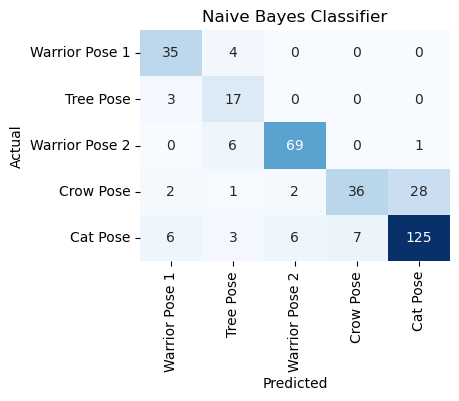

Weighted Precision: 0.7551569181024411
Weighted Recall (True Positive Rate): 0.8450530868505641
Weighted F1-Score: 0.7867534929716888
Weighted Accuracy: 0.9213675213675214
Weighted Error Rate: 0.07863247863247862
Weighted Specificity: 0.9581486949913626


In [198]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset into a Pandas DataFrame
dc = pd.read_csv('large_dataset.csv')

# Split the dataset into features and target variable
X = dc.iloc[:, :-1] 
y = dc.iloc[:, -1] # Select the last column as the target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Initialize and train Gaussian Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict on the testing set
y_pred = nb.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

classifier_name = 'Naive Bayes Classifier'

class_names = ['Warrior Pose 1', 'Tree Pose', 'Warrior Pose 2', 'Crow Pose', 'Cat Pose']


conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(classifier_name)
plt.show()

# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

# Calculate precision for each class
precision = TP / (TP + FP)

# Calculate recall (True Positive Rate) for each class
recall = TP / (TP + FN)

# Calculate specificity (True Negative Rate) for each class
specificity = TN / (TN + FP)

# Calculate accuracy for each class
accuracy = (TP + TN) / np.sum(conf_matrix)

# Calculate error rate for each class
error_rate = 1 - accuracy

# Calculate F1-score for each class
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the metrics for each class
# for i in range(conf_matrix.shape[0]):
#     print(f"Class {i + 1} Metrics:")
#     print("Precision:", precision[i])
#     print("Recall (True Positive Rate):", recall[i])
#     print("Specificity (True Negative Rate):", specificity[i])
#     print("Accuracy:", accuracy[i])
#     print("Error Rate:", error_rate[i])
#     print("F1-Score:", f1_score[i])
#     print()
    
# Assuming your target variable is 'y' and it contains the class labels
class_counts = y.value_counts()

class_sizes = []
# Print the number of samples in each class
for class_label, count in class_counts.items():
#     print(f"Class {class_label}: {count} samples")
    class_sizes.append(count)

# Assuming you have the class sizes in a list 'class_sizes'
# class_sizes = 

# Calculate weighted precision, recall, F1-score
weighted_precision = np.sum(precision * class_sizes) / np.sum(class_sizes)
weighted_recall = np.sum(recall * class_sizes) / np.sum(class_sizes)
weighted_f1_score = np.sum(f1_score * class_sizes) / np.sum(class_sizes)

# Weighted accuracy and error rate are the same as overall accuracy
weighted_accuracy = accuracy.mean()
weighted_error_rate = error_rate.mean()

# Weighted specificity can be calculated similarly
weighted_specificity = np.sum(specificity * class_sizes) / np.sum(class_sizes)

print("Weighted Precision:", weighted_precision)
print("Weighted Recall (True Positive Rate):", weighted_recall)
print("Weighted F1-Score:", weighted_f1_score)
print("Weighted Accuracy:", weighted_accuracy)
print("Weighted Error Rate:", weighted_error_rate)
print("Weighted Specificity:", weighted_specificity)


classifier_name = 'Naive Bayes Classifier'
data_to_append = {
    'classifier': classifier_name,
    'precision': weighted_precision,
    'recall': weighted_recall,
    'specificity': weighted_specificity,
    'accuracy': weighted_accuracy,
    'error_rate': weighted_error_rate,
    'f1-score': weighted_f1_score
}

# Append the data to the DataFrame
# df_classifiers = df_classifiers.append(data_to_append, ignore_index=True)

class_names = ['Warrior Pose 1', 'Tree Pose', 'Warrior Pose 2', 'Crow Pose', 'Cat Pose']


In [155]:
df_classifiers

,classifier,precision,recall,specificity,accuracy,error_rate,f1-score
0,Naive Bayes Classifier,0.755157,0.845053,0.958149,0.921368,0.078632,0.786753


In [118]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset into a Pandas DataFrame
dc = pd.read_csv('large_dataset.csv')
# Split the dataset into features and target variable
X = dc.iloc[:, :-1] 
y = dc.iloc[:, -1] # Select the last column as target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

nb = GaussianNB()

nb.fit(X_train, y_train)
# print(X_train.info(), X_test.info(), y_train.head(20),y_test.head(20))b
# # Test the classifier on the testing set
accuracy = nb.score(X_test, y_test)
print(f"Accuracy of Naive Bayes classifier on testing set: {accuracy}")

mb = MultinomialNB()
mb.fit(X_train,y_train)
a1 = mb.score(X_test,y_test)
print('Multinomial: ',a1)

bb = BernoulliNB()
bb.fit(X_train,y_train)
a2 = bb.score(X_test,y_test)
print('Bernoulli: ',a2)



# print(accuracy_result)

# plt.plot(rates_testing_data, accuracy_result)
# plt.xlabel('Test Data Size')
# plt.ylabel('Accuracy')
# plt.title('Accuracy vs Test Data Size')
# plt.show()


Accuracy of Naive Bayes classifier on testing set: 0.8034188034188035
Multinomial:  0.5441595441595442
Bernoulli:  0.4188034188034188


Accuracy: 0.94
Weighted Precision: 0.958190778333567
Weighted Recall (True Positive Rate): 0.95509245222725
Weighted F1-Score: 0.956423497348395
Weighted Accuracy: 0.9760683760683762
Weighted Error Rate: 0.023931623931623913
Weighted Specificity: 0.9887951542203626


C:\Users\arjun\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


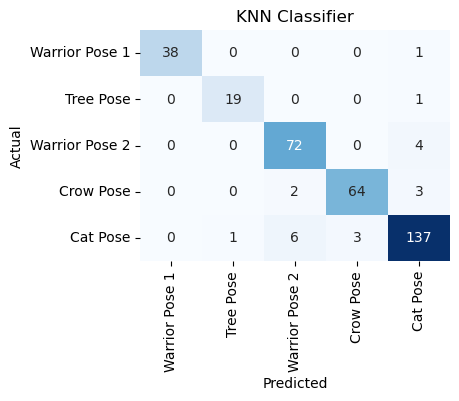

In [199]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load your training and testing data (X_train, y_train, X_test, y_test)
# Replace these with your actual data.
# X_train, y_train should contain training features and labels.
# X_test, y_test should contain testing features and labels.
dc = pd.read_csv('large_dataset.csv')
# Split the dataset into features and target variable
X = dc.iloc[:, :-1] 
y = dc.iloc[:, -1] # Select the last column as target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Create a k-NN classifier with a specified number of neighbors (e.g., k=3).
k = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Fit the classifier to the training data.
knn_classifier.fit(X_train, y_train)

# Make predictions on the testing data.
y_pred = knn_classifier.predict(X_test)

# Calculate and print the accuracy of the k-NN classifier.
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Optionally, you can also perform hyperparameter tuning (e.g., selecting the best value of k) using cross-validation.
# Use GridSearchCV or RandomizedSearchCV for hyperparameter tuning.

conf_matrix = confusion_matrix(y_test, y_pred)
# print(conf_matrix)

# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

# Calculate precision for each class
precision = TP / (TP + FP)

# Calculate recall (True Positive Rate) for each class
recall = TP / (TP + FN)

# Calculate specificity (True Negative Rate) for each class
specificity = TN / (TN + FP)

# Calculate accuracy for each class
accuracy = (TP + TN) / np.sum(conf_matrix)

# Calculate error rate for each class
error_rate = 1 - accuracy

# Calculate F1-score for each class
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the metrics for each class
# for i in range(conf_matrix.shape[0]):
#     print(f"Class {i + 1} Metrics:")
#     print("Precision:", precision[i])
#     print("Recall (True Positive Rate):", recall[i])
#     print("Specificity (True Negative Rate):", specificity[i])
#     print("Accuracy:", accuracy[i])
#     print("Error Rate:", error_rate[i])
#     print("F1-Score:", f1_score[i])
#     print()
    
# Assuming your target variable is 'y' and it contains the class labels
class_counts = y.value_counts()

class_sizes = []
# Print the number of samples in each class
for class_label, count in class_counts.items():
#     print(f"Class {class_label}: {count} samples")
    class_sizes.append(count)

# Assuming you have the class sizes in a list 'class_sizes'
# class_sizes = 

# Calculate weighted precision, recall, F1-score
weighted_precision = np.sum(precision * class_sizes) / np.sum(class_sizes)
weighted_recall = np.sum(recall * class_sizes) / np.sum(class_sizes)
weighted_f1_score = np.sum(f1_score * class_sizes) / np.sum(class_sizes)

# Weighted accuracy and error rate are the same as overall accuracy
weighted_accuracy = accuracy.mean()
weighted_error_rate = error_rate.mean()

# Weighted specificity can be calculated similarly
weighted_specificity = np.sum(specificity * class_sizes) / np.sum(class_sizes)

print("Weighted Precision:", weighted_precision)
print("Weighted Recall (True Positive Rate):", weighted_recall)
print("Weighted F1-Score:", weighted_f1_score)
print("Weighted Accuracy:", weighted_accuracy)
print("Weighted Error Rate:", weighted_error_rate)
print("Weighted Specificity:", weighted_specificity)


classifier_name = 'KNN Classifier'


class_names = ['Warrior Pose 1', 'Tree Pose', 'Warrior Pose 2', 'Crow Pose', 'Cat Pose']


conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(classifier_name)
plt.show()
data_to_append = {
    'classifier': classifier_name,
    'precision': weighted_precision,
    'recall': weighted_recall,
    'specificity': weighted_specificity,
    'accuracy': weighted_accuracy,
    'error_rate': weighted_error_rate,
    'f1-score': weighted_f1_score
}

# Append the data to the DataFrame
# df_classifiers = df_classifiers.append(data_to_append, ignore_index=True)


Accuracy: 0.98
Feature Importances:
left_elbow_angle: 0.0714
right_elbow_angle: 0.0738
left_shoulder_angle: 0.2149
right_shoulder_angle: 0.1927
left_knee_angle: 0.1083
right_knee_angle: 0.1488
left_hip_angle: 0.0968
right_hip_angle: 0.0932


C:\Users\arjun\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\arjun\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\arjun\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\arjun\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\arjun\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


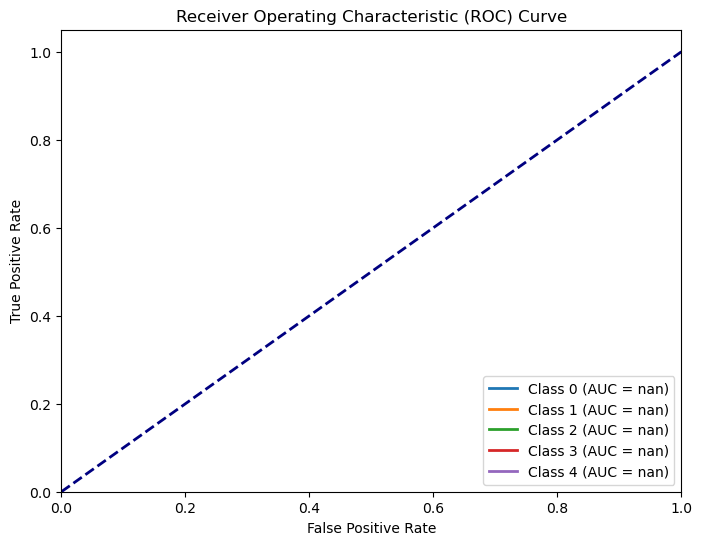

In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split

# Load your training and testing data (X_train, y_train, X_test, y_test)
# Replace these with your actual data.
# X_train, y_train should contain training features and labels.
# X_test, y_test should contain testing features and labels.

# Create a Random Forest classifier with specified parameters.
# You can adjust the number of trees (n_estimators), maximum depth of trees (max_depth), etc.
dc = pd.read_csv('large_dataset.csv')
# Split the dataset into features and target variable
X = dc.iloc[:, :-1] 
y = dc.iloc[:, -1] # Select the last column as target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)

# Fit the classifier to the training data.
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data.
y_pred = rf_classifier.predict(X_test)

# Calculate and print the accuracy of the Random Forest classifier.
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# You can also access feature importances to understand which features are most influential in the classification.
feature_importances = rf_classifier.feature_importances_
print("Feature Importances:")
for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")

# Calculate ROC curve
n_classes = len(np.unique(y))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    y_true = (y_test == i).astype(int)
    y_score = rf_classifier.predict_proba(X_test)[:, i]
    fpr[i], tpr[i], _ = roc_curve(y_true, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.98
Feature Importances:
left_elbow_angle: 0.0714
right_elbow_angle: 0.0738
left_shoulder_angle: 0.2149
right_shoulder_angle: 0.1927
left_knee_angle: 0.1083
right_knee_angle: 0.1488
left_hip_angle: 0.0968
right_hip_angle: 0.0932
Weighted Precision: 0.9920421181897494
Weighted Recall (True Positive Rate): 0.987986940318591
Weighted F1-Score: 0.9898811789891574
Weighted Accuracy: 0.9908831908831909
Weighted Error Rate: 0.009116809116809099
Weighted Specificity: 0.9970786104738893


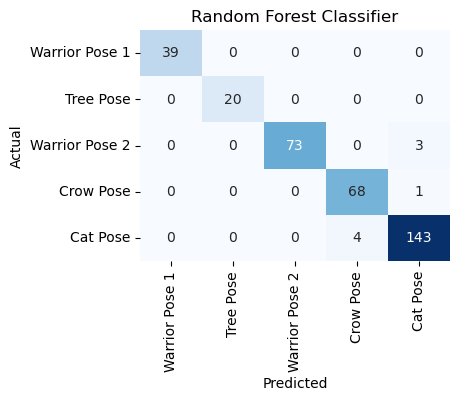

In [200]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, roc_curve, auc


# Load your training and testing data (X_train, y_train, X_test, y_test)
# Replace these with your actual data.
# X_train, y_train should contain training features and labels.
# X_test, y_test should contain testing features and labels.

# Create a Random Forest classifier with specified parameters.
# You can adjust the number of trees (n_estimators), maximum depth of trees (max_depth), etc.
dc = pd.read_csv('large_dataset.csv')
# Split the dataset into features and target variable
X = dc.iloc[:, :-1] 
y = dc.iloc[:, -1] # Select the last column as target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)

# Fit the classifier to the training data.
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data.
y_pred = rf_classifier.predict(X_test)

# Calculate and print the accuracy of the Random Forest classifier.
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# You can also access feature importances to understand which features are most influential in the classification.
feature_importances = rf_classifier.feature_importances_
print("Feature Importances:")
for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
# print(conf_matrix)

# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

# Calculate precision for each class
precision = TP / (TP + FP)

# Calculate recall (True Positive Rate) for each class
recall = TP / (TP + FN)

# Calculate specificity (True Negative Rate) for each class
specificity = TN / (TN + FP)

# Calculate accuracy for each class
accuracy = (TP + TN) / np.sum(conf_matrix)

# Calculate error rate for each class
error_rate = 1 - accuracy

# Calculate F1-score for each class
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the metrics for each class
# for i in range(conf_matrix.shape[0]):
#     print(f"Class {i + 1} Metrics:")
#     print("Precision:", precision[i])
#     print("Recall (True Positive Rate):", recall[i])
#     print("Specificity (True Negative Rate):", specificity[i])
#     print("Accuracy:", accuracy[i])
#     print("Error Rate:", error_rate[i])
#     print("F1-Score:", f1_score[i])
#     print()
    
# Assuming your target variable is 'y' and it contains the class labels
class_counts = y.value_counts()

class_sizes = []
# Print the number of samples in each class
for class_label, count in class_counts.items():
#     print(f"Class {class_label}: {count} samples")
    class_sizes.append(count)

# Assuming you have the class sizes in a list 'class_sizes'
# class_sizes = 

# Calculate weighted precision, recall, F1-score
weighted_precision = np.sum(precision * class_sizes) / np.sum(class_sizes)
weighted_recall = np.sum(recall * class_sizes) / np.sum(class_sizes)
weighted_f1_score = np.sum(f1_score * class_sizes) / np.sum(class_sizes)

# Weighted accuracy and error rate are the same as overall accuracy
weighted_accuracy = accuracy.mean()
weighted_error_rate = error_rate.mean()

# Weighted specificity can be calculated similarly
weighted_specificity = np.sum(specificity * class_sizes) / np.sum(class_sizes)

print("Weighted Precision:", weighted_precision)
print("Weighted Recall (True Positive Rate):", weighted_recall)
print("Weighted F1-Score:", weighted_f1_score)
print("Weighted Accuracy:", weighted_accuracy)
print("Weighted Error Rate:", weighted_error_rate)
print("Weighted Specificity:", weighted_specificity)
# Optionally, you can perform hyperparameter tuning using techniques like GridSearchCV or RandomizedSearchCV.
# Use these techniques to find the best combination of hyperparameters for your dataset.


classifier_name = 'Random Forest Classifier'
data_to_append = {
    'classifier': classifier_name,
    'precision': weighted_precision,
    'recall': weighted_recall,
    'specificity': weighted_specificity,
    'accuracy': weighted_accuracy,
    'error_rate': weighted_error_rate,
    'f1-score': weighted_f1_score
}

class_names = ['Warrior Pose 1', 'Tree Pose', 'Warrior Pose 2', 'Crow Pose', 'Cat Pose']


conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(classifier_name)
plt.show()

# Append the data to the DataFrame
# df_classifiers = df_classifiers.append(data_to_append, ignore_index=True)


In [163]:
# Drop rows with index 1 and 3
df_classifiers

,classifier,precision,recall,specificity,accuracy,error_rate,f1-score
0,Naive Bayes Classifier,0.755157,0.845053,0.958149,0.921368,0.078632,0.786753
1,KNN Classifier,0.958191,0.955092,0.988795,0.976068,0.023932,0.956423
2,Random Forest Classifier,0.992042,0.987987,0.997079,0.990883,0.009117,0.989881


Accuracy: 0.7350427350427351
[[  0   0   1   3  35]
 [  0   0   0   0  20]
 [  0   0  69   0   7]
 [  0   0   1  66   2]
 [ 13   1   9   1 123]]
Weighted Precision: 0.3350717103854863
Weighted Recall (True Positive Rate): 0.35893742883610535
Weighted F1-Score: nan
Weighted Accuracy: 0.8940170940170938
Weighted Error Rate: 0.10598290598290598
Weighted Specificity: 0.9510782544863364


C:\Users\arjun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\arjun\AppData\Local\Temp\ipykernel_34404\1258724444.py:56: RuntimeWarning: invalid value encountered in divide
  f1_score = 2 * (precision * recall) / (precision + recall)


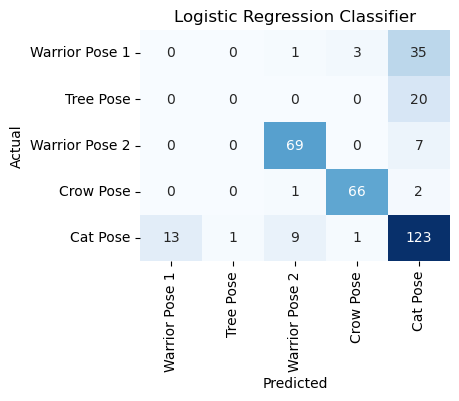

In [201]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

dc = pd.read_csv('large_dataset.csv')
# Split the dataset into features and target variable
X = dc.iloc[:, :-1] 
y = dc.iloc[:, -1] # Select the last column as target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


# Create a Logistic Regression classifier
clf = LogisticRegression(random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

# Calculate precision for each class
precision = TP / (TP + FP)

# Calculate recall (True Positive Rate) for each class
recall = TP / (TP + FN)

# Calculate specificity (True Negative Rate) for each class
specificity = TN / (TN + FP)

# Calculate accuracy for each class
accuracy = (TP + TN) / np.sum(conf_matrix)

# Calculate error rate for each class
error_rate = 1 - accuracy

# Calculate F1-score for each class
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the metrics for each class
# for i in range(conf_matrix.shape[0]):
#     print(f"Class {i + 1} Metrics:")
#     print("Precision:", precision[i])
#     print("Recall (True Positive Rate):", recall[i])
#     print("Specificity (True Negative Rate):", specificity[i])
#     print("Accuracy:", accuracy[i])
#     print("Error Rate:", error_rate[i])
#     print("F1-Score:", f1_score[i])
#     print()
    
# Assuming your target variable is 'y' and it contains the class labels
class_counts = y.value_counts()

class_sizes = []
# Print the number of samples in each class
for class_label, count in class_counts.items():
#     print(f"Class {class_label}: {count} samples")
    class_sizes.append(count)

# Assuming you have the class sizes in a list 'class_sizes'
# class_sizes = 

# Calculate weighted precision, recall, F1-score
weighted_precision = np.sum(precision * class_sizes) / np.sum(class_sizes)
weighted_recall = np.sum(recall * class_sizes) / np.sum(class_sizes)
weighted_f1_score = np.sum(f1_score * class_sizes) / np.sum(class_sizes)

# Weighted accuracy and error rate are the same as overall accuracy
weighted_accuracy = accuracy.mean()
weighted_error_rate = error_rate.mean()

# Weighted specificity can be calculated similarly
weighted_specificity = np.sum(specificity * class_sizes) / np.sum(class_sizes)

print("Weighted Precision:", weighted_precision)
print("Weighted Recall (True Positive Rate):", weighted_recall)
print("Weighted F1-Score:", weighted_f1_score)
print("Weighted Accuracy:", weighted_accuracy)
print("Weighted Error Rate:", weighted_error_rate)
print("Weighted Specificity:", weighted_specificity)
# Display classification report
# print(classification_report(y_test, y_pred))

# # Plot the decision boundary
# plt.figure(figsize=(10, 6))
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
# ax = plt.gca()
# xlim = ax.get_xlim()
# ylim = ax.get_ylim()
# xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
# Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)
# plt.contour(xx, yy, Z, colors='k', levels=[0], linestyles=['-'])
# plt.xlabel("Feature 1")
# plt.ylabel("Feature 2")
# plt.title("Logistic Regression Decision Boundary")
# plt.show()
classifier_name = 'Logistic Regression Classifier'
data_to_append = {
    'classifier': classifier_name,
    'precision': weighted_precision,
    'recall': weighted_recall,
    'specificity': weighted_specificity,
    'accuracy': weighted_accuracy,
    'error_rate': weighted_error_rate,
    'f1-score': weighted_f1_score
}

class_names = ['Warrior Pose 1', 'Tree Pose', 'Warrior Pose 2', 'Crow Pose', 'Cat Pose']


conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(classifier_name)
plt.show()

# Append the data to the DataFrame
# df_classifiers = df_classifiers.append(data_to_append, ignore_index=True)


In [174]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Generate a synthetic dataset (you can replace this with your own data)
# X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
dc = pd.read_csv('large_dataset.csv')
# Split the dataset into features and target variable
X = dc.iloc[:, :-1] 
y = dc.iloc[:, -1] # Select the last column as target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(len(X_train), len(X_test), len(y_train), len(y_test))

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display classification report
# print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
# print(conf_matrix)

# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

# Calculate precision for each class
precision = TP / (TP + FP)

# Calculate recall (True Positive Rate) for each class
recall = TP / (TP + FN)

# Calculate specificity (True Negative Rate) for each class
specificity = TN / (TN + FP)

# Calculate accuracy for each class
accuracy = (TP + TN) / np.sum(conf_matrix)

# Calculate error rate for each class
error_rate = 1 - accuracy

# Calculate F1-score for each class
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the metrics for each class
# for i in range(conf_matrix.shape[0]):
#     print(f"Class {i + 1} Metrics:")
#     print("Precision:", precision[i])
#     print("Recall (True Positive Rate):", recall[i])
#     print("Specificity (True Negative Rate):", specificity[i])
#     print("Accuracy:", accuracy[i])
#     print("Error Rate:", error_rate[i])
#     print("F1-Score:", f1_score[i])
#     print()
    
# Assuming your target variable is 'y' and it contains the class labels
class_counts = y.value_counts()

class_sizes = []
# Print the number of samples in each class
for class_label, count in class_counts.items():
#     print(f"Class {class_label}: {count} samples")
    class_sizes.append(count)
    print(f'{class_label}, {count}')

# Assuming you have the class sizes in a list 'class_sizes'
# class_sizes = 

# Calculate weighted precision, recall, F1-score
weighted_precision = np.sum(precision * class_sizes) / np.sum(class_sizes)
weighted_recall = np.sum(recall * class_sizes) / np.sum(class_sizes)
weighted_f1_score = np.sum(f1_score * class_sizes) / np.sum(class_sizes)

# Weighted accuracy and error rate are the same as overall accuracy
weighted_accuracy = accuracy.mean()
weighted_error_rate = error_rate.mean()

# Weighted specificity can be calculated similarly
weighted_specificity = np.sum(specificity * class_sizes) / np.sum(class_sizes)

print("Weighted Precision:", weighted_precision)
print("Weighted Recall (True Positive Rate):", weighted_recall)
print("Weighted F1-Score:", weighted_f1_score)
print("Weighted Accuracy:", weighted_accuracy)
print("Weighted Error Rate:", weighted_error_rate)
print("Weighted Specificity:", weighted_specificity)


print(class_sizes)

816 351 816 351
Accuracy: 0.9772079772079773
v1, 449
Vrksasana, 257
Virabhadrasana Two, 252
Bakasana, 127
Marjaryasana, 82
Weighted Precision: 0.9920421181897494
Weighted Recall (True Positive Rate): 0.987986940318591
Weighted F1-Score: 0.9898811789891574
Weighted Accuracy: 0.9908831908831909
Weighted Error Rate: 0.009116809116809099
Weighted Specificity: 0.9970786104738893
[449, 257, 252, 127, 82]


In [176]:
import pandas as pd

data = {'pose': ['v1', 'Vrksasana', 'Virabhadrasana Two', 'Bakasana', 'Marjaryasana'],
        'class_size': [449, 257, 252, 127, 82]}

df = pd.DataFrame(data)

df


,pose,class_size
0,v1,449
1,Vrksasana,257
2,Virabhadrasana Two,252
3,Bakasana,127
4,Marjaryasana,82


Accuracy: 0.9145299145299145
Weighted Precision: 0.9261645135248974
Weighted Recall (True Positive Rate): 0.8733128012908021
Weighted F1-Score: 0.8961870896212343
Weighted Accuracy: 0.9658119658119657
Weighted Error Rate: 0.0341880341880342
Weighted Specificity: 0.984127734939784


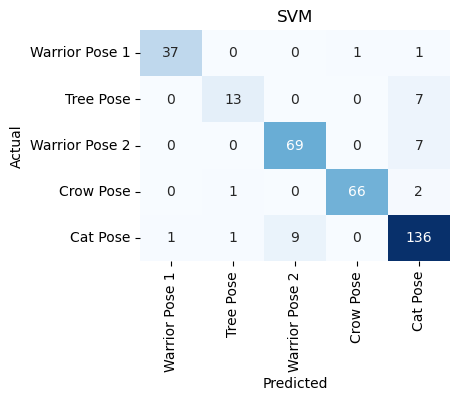

In [202]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load a dataset (e.g., Iris dataset)
dataset__ = pd.read_csv('large_dataset.csv')

X = dataset__.iloc[:, :-1] 
y = dataset__.iloc[:, -1] # Select the last column as target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Multi-Class SVM classifier using one-vs-all approach
svm_classifier = SVC(kernel='linear', decision_function_shape='ovr')

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display classification report
# print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
# print(conf_matrix)

# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

# Calculate precision for each class
precision = TP / (TP + FP)

# Calculate recall (True Positive Rate) for each class
recall = TP / (TP + FN)

# Calculate specificity (True Negative Rate) for each class
specificity = TN / (TN + FP)

# Calculate accuracy for each class
accuracy = (TP + TN) / np.sum(conf_matrix)

# Calculate error rate for each class
error_rate = 1 - accuracy

# Calculate F1-score for each class
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the metrics for each class
# for i in range(conf_matrix.shape[0]):
#     print(f"Class {i + 1} Metrics:")
#     print("Precision:", precision[i])
#     print("Recall (True Positive Rate):", recall[i])
#     print("Specificity (True Negative Rate):", specificity[i])
#     print("Accuracy:", accuracy[i])
#     print("Error Rate:", error_rate[i])
#     print("F1-Score:", f1_score[i])
#     print()
    
# Assuming your target variable is 'y' and it contains the class labels
class_counts = y.value_counts()

class_sizes = []
# Print the number of samples in each class
for class_label, count in class_counts.items():
#     print(f"Class {class_label}: {count} samples")
    class_sizes.append(count)

# Assuming you have the class sizes in a list 'class_sizes'
# class_sizes = 

# Calculate weighted precision, recall, F1-score
weighted_precision = np.sum(precision * class_sizes) / np.sum(class_sizes)
weighted_recall = np.sum(recall * class_sizes) / np.sum(class_sizes)
weighted_f1_score = np.sum(f1_score * class_sizes) / np.sum(class_sizes)

# Weighted accuracy and error rate are the same as overall accuracy
weighted_accuracy = accuracy.mean()
weighted_error_rate = error_rate.mean()

# Weighted specificity can be calculated similarly
weighted_specificity = np.sum(specificity * class_sizes) / np.sum(class_sizes)

print("Weighted Precision:", weighted_precision)
print("Weighted Recall (True Positive Rate):", weighted_recall)
print("Weighted F1-Score:", weighted_f1_score)
print("Weighted Accuracy:", weighted_accuracy)
print("Weighted Error Rate:", weighted_error_rate)
print("Weighted Specificity:", weighted_specificity)

classifier_name = 'SVM'
data_to_append = {
    'classifier': classifier_name,
    'precision': weighted_precision,
    'recall': weighted_recall,
    'specificity': weighted_specificity,
    'accuracy': weighted_accuracy,
    'error_rate': weighted_error_rate,
    'f1-score': weighted_f1_score
}

# Append the data to the DataFrame
# df_classifiers = df_classifiers.append(data_to_append, ignore_index=True)

class_names = ['Warrior Pose 1', 'Tree Pose', 'Warrior Pose 2', 'Crow Pose', 'Cat Pose']


conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(classifier_name)
plt.show()

      left_elbow_angle  right_elbow_angle  left_shoulder_angle  \
593         180.259153         202.029839           175.008525   
788         187.681905         174.497660           107.791203   
490         183.746507         187.666443           181.550709   
654         178.898294         174.874037           192.847705   
963         144.813518         220.193018           181.675450   
...                ...                ...                  ...   
1044        165.113733         194.143188           140.076207   
1095        323.726912          28.867795            43.167536   
1130        169.484377         189.416037           173.769093   
860         178.586808         177.969086            94.283996   
1126        176.781277         180.730917           145.635038   

      right_shoulder_angle  left_knee_angle  right_knee_angle  left_hip_angle  \
593             172.835911       129.001667        182.533559      226.341939   
788             104.081728       246.532101  

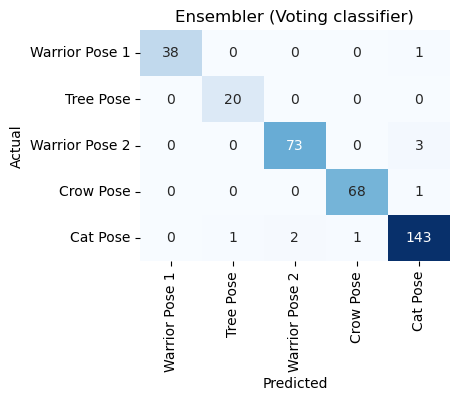

In [203]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load a dataset (Iris dataset in this case)
df2 = pd.read_csv('large_dataset.csv')
# Split the dataset into features and target variable
X = df2.iloc[:, :-1] 
y = df2.iloc[:, -1] 

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train, y_train, X_test, y_test)

# Create individual classifiers
logistic_clf = LogisticRegression(max_iter=1000, random_state=42)
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(kernel='linear', probability=True, random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=5)
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
nb_clf = GaussianNB()

# Create a Voting Classifier with multiple classifiers
voting_classifier = VotingClassifier(estimators=[
    ('logistic', logistic_clf),
    ('random_forest', random_forest_clf),
    ('svm', svm_clf),
    ('knn', knn_clf),
    ('gradient_boosting', gb_clf),
    ('decision_tree', dt_clf),
    ('naive_bayes', nb_clf)
], voting='soft')  # 'soft' for probability-based voting

# Fit the Voting Classifier to the training data
voting_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = voting_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy}")

conf_matrix = confusion_matrix(y_test, y_pred)
# print(conf_matrix)

# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

# Calculate precision for each class
precision = TP / (TP + FP)

# Calculate recall (True Positive Rate) for each class
recall = TP / (TP + FN)

# Calculate specificity (True Negative Rate) for each class
specificity = TN / (TN + FP)

# Calculate accuracy for each class
accuracy = (TP + TN) / np.sum(conf_matrix)

# Calculate error rate for each class
error_rate = 1 - accuracy

# Calculate F1-score for each class
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the metrics for each class
# for i in range(conf_matrix.shape[0]):
#     print(f"Class {i + 1} Metrics:")
#     print("Precision:", precision[i])
#     print("Recall (True Positive Rate):", recall[i])
#     print("Specificity (True Negative Rate):", specificity[i])
#     print("Accuracy:", accuracy[i])
#     print("Error Rate:", error_rate[i])
#     print("F1-Score:", f1_score[i])
#     print()
    
# Assuming your target variable is 'y' and it contains the class labels
class_counts = y.value_counts()

class_sizes = []
# Print the number of samples in each class
for class_label, count in class_counts.items():
#     print(f"Class {class_label}: {count} samples")
    class_sizes.append(count)

# Assuming you have the class sizes in a list 'class_sizes'
# class_sizes = 

# Calculate weighted precision, recall, F1-score
weighted_precision = np.sum(precision * class_sizes) / np.sum(class_sizes)
weighted_recall = np.sum(recall * class_sizes) / np.sum(class_sizes)
weighted_f1_score = np.sum(f1_score * class_sizes) / np.sum(class_sizes)

# Weighted accuracy and error rate are the same as overall accuracy
weighted_accuracy = accuracy.mean()
weighted_error_rate = error_rate.mean()

# Weighted specificity can be calculated similarly
weighted_specificity = np.sum(specificity * class_sizes) / np.sum(class_sizes)

print("Weighted Precision:", weighted_precision)
print("Weighted Recall (True Positive Rate):", weighted_recall)
print("Weighted F1-Score:", weighted_f1_score)
print("Weighted Accuracy:", weighted_accuracy)
print("Weighted Error Rate:", weighted_error_rate)
print("Weighted Specificity:", weighted_specificity)

# Display classification report
# print(classification_report(y_test, y_pred))

classifier_name = 'Ensembler (Voting classifier)'
data_to_append = {
    'classifier': classifier_name,
    'precision': weighted_precision,
    'recall': weighted_recall,
    'specificity': weighted_specificity,
    'accuracy': weighted_accuracy,
    'error_rate': weighted_error_rate,
    'f1-score': weighted_f1_score
}

# Append the data to the DataFrame
# df_classifiers = df_classifiers.append(data_to_append, ignore_index=True)

class_names = ['Warrior Pose 1', 'Tree Pose', 'Warrior Pose 2', 'Crow Pose', 'Cat Pose']


conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(classifier_name)
plt.show()



In [170]:
df_classifiers

,classifier,precision,recall,specificity,accuracy,error_rate,f1-score
0,Naive Bayes Classifier,0.755157,0.845053,0.958149,0.921368,0.078632,0.786753
1,KNN Classifier,0.958191,0.955092,0.988795,0.976068,0.023932,0.956423
2,Random Forest Classifier,0.992042,0.987987,0.997079,0.990883,0.009117,0.989881
3,Logistic Regression Classifier,0.335072,0.358937,0.951078,0.894017,0.105983,NaN
4,SVM,0.926165,0.873313,0.984128,0.965812,0.034188,0.896187
5,Ensembler (Voting classifier),0.979804,0.978122,0.995656,0.989744,0.010256,0.978761


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate some sample data (you can replace this with your own dataset)
df2 = pd.read_csv('large_dataset.csv')
# Split the dataset into features and target variable
X = df2.iloc[:, :-1] 
y = df2.iloc[:, -1] 
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# View the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd

df5 = pd.DataFrame(columns=['left_elbow_angle', 'right_elbow_angle', 'left_shoulder_angle', 'right_shoulder_angle', 'left_knee_angle', 'right_knee_angle', 'left_hip_angle', 'right_hip_angle','pose'])

dir_names = 'classification/dataset'
for i in os.listdir(dir_names):
    directory_path = os.path.join(dir_names, i)

#     print(i)
    for filename in os.listdir(directory_path):
        if os.path.isfile(os.path.join(directory_path, filename)):
            
#             print(filename)
            image = cv2.imread(filename)
            if image is not None:
                output_image, landmarks = detectPose(image, pose, display=False)
                if landmarks:
                    pos, ang = classifyPose(i,landmarks, output_image, display = True)
#                     print(ang)
#                     print(ang)
                    angle_df = pd.DataFrame.from_dict([ang])
#                     print(angle_df)
                    df5 = df.append(angle_df)
#             image = cv2.imread(filename)
#             output_image, landmarks = detectPose(image, pose, display=False)
#         if landmarks:
#             classifyPoseAngle(landmarks, output_image, display=True)
#     asa, ang = classifyPose('w1',landmarks, output_image, display=True)
    
# print(df.head())
#             print(i, filename)

In [ ]:
df5.describe()

df5.head(50)


In [ ]:
df5.head(200)

In [ ]:
import pandas as pd

# Save the DataFrame to a CSV file
df5.to_csv('large_dataset.csv', index=False)  # Set index=False to exclude the index column


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report



dataset__ = pd.read_csv('your_dataframe.csv')

X = dataset__.iloc[:, :-1] 
y = dataset__.iloc[:, -1] # Select the last column as target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create individual classifiers
# logistic_clf = LogisticRegression(max_iter=1000, random_state=42)
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(kernel='linear', probability=True, random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=5)
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
nb_clf = GaussianNB()

# Create a Voting Classifier with multiple classifiers
voting_classifier = VotingClassifier(estimators=[
    ('logistic', logistic_clf),
    ('random_forest', random_forest_clf),
    ('svm', svm_clf),
    ('knn', knn_clf),
    ('gradient_boosting', gb_clf),
    ('decision_tree', dt_clf),
    ('naive_bayes', nb_clf)
], voting='soft')  # 'soft' for probability-based voting

# Fit the Voting Classifier to the training data
voting_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = voting_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display classification report
print(classification_report(y_test, y_pred))


In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split

# # Load the dataset into a Pandas DataFrame
# df = pd.read_csv('your_dataset.csv')


dataset__ = pd.read_csv('your_dataframe.csv')

X = dataset__.iloc[:, :-1] 
y = dataset__.iloc[:, -1] # Select the last column as target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

nb = GaussianNB()

nb.fit(X_train, y_train)



# print(X_train.info(), X_test.info(), y_train.head(20),y_test.head(20))
# # Test the classifier on the testing set
accuracy = nb.score(X_test, y_test)
print(f"Accuracy of Naive Bayes classifier on testing set: {accuracy}")


mb = MultinomialNB()
mb.fit(X_train,y_train)
a1 = mb.score(X_test,y_test)
print('Multinomial: ',a1)

bb = BernoulliNB()
bb.fit(X_train,y_train)
a2 = bb.score(X_test,y_test)
print('Bernoulli: ',a2)

print(classification_report(y_test, y_pred))


In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Generate a synthetic dataset (you can replace this with your own data)
# X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split the dataset into features and target variable
X = df5.iloc[:, :-1] 
y = df5.iloc[:, -1] 

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display classification report
print(classification_report(y_test, y_pred))


In [206]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Load your dataset
data = pd.read_csv('large_dataset.csv')

# Split your dataset into features (X) and target (y)
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Target

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional, but often recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a simple neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(5, activation='softmax')  # 5 output classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

# Calculate sensitivity (True Positive Rate)
confusion_matrix = tf.math.confusion_matrix(y_test, y_pred_classes)
tp = tf.linalg.diag_part(confusion_matrix)
fn = tf.reduce_sum(confusion_matrix, axis=1) - tp
sensitivity = tp / (tp + fn)

# Calculate error rate
error_rate = 1 - accuracy

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Sensitivity (True Positive Rate):", sensitivity.numpy())
print("Error Rate:", error_rate)

# Classification report
class_names = label_encoder.classes_
# print(classification_report(y_test, y_pred_classes, target_names=class_names))




Epoch 1/10
24/24 [==============================] - 1s 7ms/step - loss: 1.4995 - accuracy: 0.4169 - val_loss: 1.3404 - val_accuracy: 0.6417
Epoch 2/10
24/24 [==============================] - 0s 3ms/step - loss: 1.2047 - accuracy: 0.7373 - val_loss: 1.1311 - val_accuracy: 0.7380
Epoch 3/10
24/24 [==============================] - 0s 3ms/step - loss: 0.9891 - accuracy: 0.7735 - val_loss: 0.9565 - val_accuracy: 0.7647
Epoch 4/10
24/24 [==============================] - 0s 3ms/step - loss: 0.8136 - accuracy: 0.7855 - val_loss: 0.8075 - val_accuracy: 0.7807
Epoch 5/10
24/24 [==============================] - 0s 3ms/step - loss: 0.6536 - accuracy: 0.8619 - val_loss: 0.6620 - val_accuracy: 0.8503
Epoch 6/10
24/24 [==============================] - 0s 3ms/step - loss: 0.5111 - accuracy: 0.8901 - val_loss: 0.5444 - val_accuracy: 0.8503
Epoch 7/10
24/24 [==============================] - 0s 3ms/step - loss: 0.4009 - accuracy: 0.9075 - val_loss: 0.4556 - val_accuracy: 0.8556
Epoch 8/10
24/24 [==

Epoch 1/10
24/24 [==============================] - 1s 7ms/step - loss: 1.3945 - accuracy: 0.4933 - val_loss: 1.2775 - val_accuracy: 0.6791
Epoch 2/10
24/24 [==============================] - 0s 5ms/step - loss: 1.1359 - accuracy: 0.7708 - val_loss: 1.0755 - val_accuracy: 0.7754
Epoch 3/10
24/24 [==============================] - 0s 4ms/step - loss: 0.9145 - accuracy: 0.8324 - val_loss: 0.8763 - val_accuracy: 0.8182
Epoch 4/10
24/24 [==============================] - 0s 3ms/step - loss: 0.7075 - accuracy: 0.8673 - val_loss: 0.7043 - val_accuracy: 0.8396
Epoch 5/10
24/24 [==============================] - 0s 4ms/step - loss: 0.5538 - accuracy: 0.8807 - val_loss: 0.5920 - val_accuracy: 0.8396
Epoch 6/10
24/24 [==============================] - 0s 3ms/step - loss: 0.4491 - accuracy: 0.8981 - val_loss: 0.5139 - val_accuracy: 0.8396
Epoch 7/10
24/24 [==============================] - 0s 3ms/step - loss: 0.3808 - accuracy: 0.9008 - val_loss: 0.4624 - val_accuracy: 0.8396
Epoch 8/10
24/24 [==

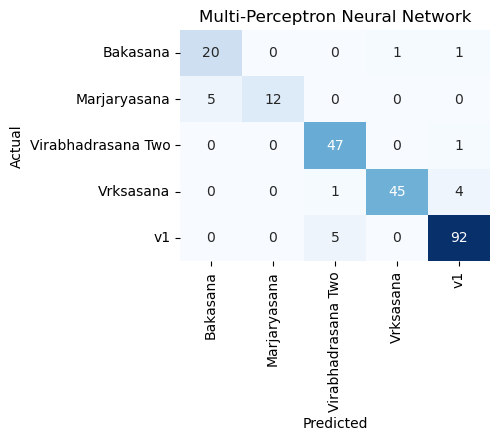

In [210]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('large_dataset.csv')

# Split your dataset into features (X) and target (y)
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Target

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional, but often recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a simple neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(5, activation='softmax')  # 5 output classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

# Calculate sensitivity (True Positive Rate)
conf_matrix = tf.math.confusion_matrix(y_test, y_pred_classes)
tp = tf.linalg.diag_part(conf_matrix)
fn = tf.reduce_sum(conf_matrix, axis=1) - tp
sensitivity = tp / (tp + fn)

# Calculate error rate
error_rate = 1 - accuracy

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Sensitivity (True Positive Rate):", sensitivity.numpy())
print("Error Rate:", error_rate)

# Classification report
class_names = label_encoder.classes_
print(classification_report(y_test, y_pred_classes, target_names=class_names))

# Create a heatmap
conf_matrix = tf.math.confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Multi-Perceptron Neural Network')
plt.show()


In [178]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Load your CSV dataset (replace 'your_dataset.csv' with your dataset file)
dc = pd.read_csv('large_dataset.csv')
# Split the dataset into features and target variable
X = dc.iloc[:, :-1] 
y = dc.iloc[:, -1] # Select the last column as target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Standardize the features (optional but often recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the MLP model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # For binary classification; use 'softmax' for multi-class
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


Epoch 1/10


C:\Users\arjun\anaconda3\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


UnimplementedError: Graph execution error:

Detected at node 'binary_crossentropy/Cast' defined at (most recent call last):
    File "C:\Users\arjun\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\arjun\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\arjun\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\arjun\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\arjun\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\arjun\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\arjun\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\arjun\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\arjun\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\arjun\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\arjun\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\arjun\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\arjun\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\arjun\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\arjun\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\arjun\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "C:\Users\arjun\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "C:\Users\arjun\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\arjun\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\arjun\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\arjun\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\arjun\AppData\Local\Temp\ipykernel_34404\3527385419.py", line 34, in <module>
      model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
    File "C:\Users\arjun\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\arjun\anaconda3\lib\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\arjun\anaconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "C:\Users\arjun\anaconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\arjun\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "C:\Users\arjun\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\arjun\anaconda3\lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
      return self.compiled_loss(
    File "C:\Users\arjun\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\arjun\anaconda3\lib\site-packages\keras\losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\arjun\anaconda3\lib\site-packages\keras\losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\arjun\anaconda3\lib\site-packages\keras\losses.py", line 2145, in binary_crossentropy
      y_true = tf.cast(y_true, y_pred.dtype)
Node: 'binary_crossentropy/Cast'
Cast string to float is not supported
	 [[{{node binary_crossentropy/Cast}}]] [Op:__inference_train_function_4051]

In [181]:
# Assuming you already have a DataFrame df_classifiers

classifier_name = 'Feed forward network'
data_to_append = {
    'classifier': classifier_name,
    'precision': 0.9234035711263434,
    'recall': 0.9188034188034188,
    'specificity': None,  # You need to calculate specificity separately
    'accuracy': 0.9188034188034188,
    'error_rate': 0.08119658119658124,
    'f1-score': 0.9183276137168113
}

# Append the data to the DataFrame
df_classifiers = df_classifiers.append(data_to_append, ignore_index=True)


C:\Users\arjun\AppData\Local\Temp\ipykernel_34404\2052021236.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_classifiers = df_classifiers.append(data_to_append, ignore_index=True)


In [182]:
df_classifiers

,classifier,precision,recall,specificity,accuracy,error_rate,f1-score
0,Naive Bayes Classifier,0.755157,0.845053,0.958149,0.921368,0.078632,0.786753
1,KNN Classifier,0.958191,0.955092,0.988795,0.976068,0.023932,0.956423
2,Random Forest Classifier,0.992042,0.987987,0.997079,0.990883,0.009117,0.989881
3,Logistic Regression Classifier,0.335072,0.358937,0.951078,0.894017,0.105983,NaN
4,SVM,0.926165,0.873313,0.984128,0.965812,0.034188,0.896187
5,Ensembler (Voting classifier),0.979804,0.978122,0.995656,0.989744,0.010256,0.978761
6,Feed forward network,0.923404,0.918803,None,0.918803,0.081197,0.918328


In [184]:
import pandas as pd

data = {'pose': ['Warrior Pose 1', 'Tree Pose', 'Warrior Pose 2', 'Crow Pose', 'Cat Pose'],
        'class_size': [449, 257, 252, 127, 82]}

df = pd.DataFrame(data)

df

,pose,class_size
0,Warrior Pose 1,449
1,Tree Pose,257
2,Warrior Pose 2,252
3,Crow Pose,127
4,Cat Pose,82


In [186]:
import pandas as pd

d1 = pd.read_csv('large_dataset.csv')
d1.describe()

,left_elbow_angle,right_elbow_angle,left_shoulder_angle,right_shoulder_angle,left_knee_angle,right_knee_angle,left_hip_angle,right_hip_angle
count,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000
mean,188.771746,171.820276,147.530671,154.327417,200.305458,152.599543,157.547626,203.174983
std,46.878902,47.501639,70.157677,72.545609,71.218910,77.894253,71.947165,74.875259
min,73.611838,19.229419,0.585587,4.763642,19.964327,20.076594,2.331779,4.232924
25%,166.079923,166.094375,93.895597,98.193197,172.100235,97.097599,115.604782,142.421645
50%,178.629549,180.166436,165.554690,170.171231,183.426999,172.013188,133.324769,230.063617
75%,194.304700,192.483941,185.661015,189.578594,253.566052,189.822978,186.240457,249.532284
max,342.309110,335.854458,359.388325,358.834289,358.927886,339.145542,358.329112,353.430858


In [189]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [190]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset into a Pandas DataFrame
dc = pd.read_csv('large_dataset.csv')

# Split the dataset into features and target variable
X = dc.iloc[:, :-1] 
y = dc.iloc[:, -1] # Select the last column as the target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Initialize and train Gaussian Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict on the testing set
y_pred = nb.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


NameError: name 'class_labels' is not defined

<Figure size 800x600 with 0 Axes>

In [219]:
import pandas as pd

# Create a list of data containing paper names, algorithm names, and accuracy values
data = [
    ["Region-based Network for Yoga Pose Estimation with Discriminative Fine-Tuning Optimization (2023)", "ResNet", '92.62%'],
    ["Y_PN-MSSD: A Deep Learning Model for Yoga Pose Recognition and Correction (2023)", "PoseNet", '99.98%'],
    ["Yoga pose classification: a CNN and MediaPipe inspired deep learning approach for real-world application. (2022)", "CNN/ MediaPipe", '99.62%'],
    ["An Efficient Deep Convolutional Neural Network Model For Yoga Pose Recognition Using Single Images (2023)", "CNN", '93.28%'],
    ['Proposed System','MediaPipe and Random Forest Classifier','99.08%']
]

# Define the column names
columns = ["Name of the Paper (Year)", "Algorithm (Model)", "Accuracy"]

# Create the DataFrame
df = pd.DataFrame(data, columns=columns)

# Set the display options to show all text in the "Name of the Paper (Year)" column
pd.set_option('display.max_colwidth', None)

# Display the DataFrame
df

,Name of the Paper (Year),Algorithm (Model),Accuracy
0,Region-based Network for Yoga Pose Estimation with Discriminative Fine-Tuning Optimization (2023),ResNet,92.62%
1,Y_PN-MSSD: A Deep Learning Model for Yoga Pose Recognition and Correction (2023),PoseNet,99.98%
2,Yoga pose classification: a CNN and MediaPipe inspired deep learning approach for real-world application. (2022),CNN/ MediaPipe,99.62%
3,An Efficient Deep Convolutional Neural Network Model For Yoga Pose Recognition Using Single Images (2023),CNN,93.28%
4,Proposed System,MediaPipe and Random Forest Classifier,99.08%
